In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Reading the datasets

In [2]:
df_lendingclub = pd.read_csv('../Data/Lending Club dataset/accepted_2007_to_2018Q4.csv', low_memory=True)

In [3]:
df_lendingclub.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_GDP = pd.read_csv('./Data/Macro Dataset/GDP.csv', low_memory=True)

df_GDP.head()

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [5]:
df_infl_rate = pd.read_csv('./Data/Macro Dataset/Inflation.csv', low_memory=True)

df_infl_rate.head()

,DATE,FPCPITOTLZGUSA
0,1960-01-01,1.457976
1,1961-01-01,1.070724
2,1962-01-01,1.198773
3,1963-01-01,1.239669
4,1964-01-01,1.278912


In [6]:
df_unemp_rate = pd.read_csv('./Data/Macro Dataset/UNRATE.csv', low_memory=True)

df_unemp_rate.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


# Preprocessing

## Lending Club Dataset

**Goal**: This is big dataset with a large number of features. As we explore this dataset, we expect to figure out the followings:
- The feature that the classification model will predict, which is the `loan_status`
- The features that may have some correlation with the feature we want to predict.

In [7]:
df_lendingclub.shape

(2260701, 151)

In [8]:
#Show the name of every column in the dataset.

for index, column in enumerate(df_lendingclub.columns, start=1):
    print(f'{index}. {column}')

1. id
2. member_id
3. loan_amnt
4. funded_amnt
5. funded_amnt_inv
6. term
7. int_rate
8. installment
9. grade
10. sub_grade
11. emp_title
12. emp_length
13. home_ownership
14. annual_inc
15. verification_status
16. issue_d
17. loan_status
18. pymnt_plan
19. url
20. desc
21. purpose
22. title
23. zip_code
24. addr_state
25. dti
26. delinq_2yrs
27. earliest_cr_line
28. fico_range_low
29. fico_range_high
30. inq_last_6mths
31. mths_since_last_delinq
32. mths_since_last_record
33. open_acc
34. pub_rec
35. revol_bal
36. revol_util
37. total_acc
38. initial_list_status
39. out_prncp
40. out_prncp_inv
41. total_pymnt
42. total_pymnt_inv
43. total_rec_prncp
44. total_rec_int
45. total_rec_late_fee
46. recoveries
47. collection_recovery_fee
48. last_pymnt_d
49. last_pymnt_amnt
50. next_pymnt_d
51. last_credit_pull_d
52. last_fico_range_high
53. last_fico_range_low
54. collections_12_mths_ex_med
55. mths_since_last_major_derog
56. policy_code
57. application_type
58. annual_inc_joint
59. dti_joi

The column names and get their definitions 

| Feature No. | Feature Name                                  | Description |
|-------------|-----------------------------------------------|-------------|
| 1           | id                                            | Unique identifier for the loan |
| 2           | member_id                                     | Unique identifier for the member or borrower |
| 3           | loan_amnt                                     | The amount of loan applied for |
| 4           | funded_amnt                                   | The amount of loan funded |
| 5           | funded_amnt_inv                               | The amount of loan funded by investors |
| 6           | term                                          | The term of the loan in months |
| 7           | int_rate                                      | Interest rate on the loan |
| 8           | installment                                   | Monthly payment owed by the borrower |
| 9           | grade                                         | Loan grade based on risk level |
| 10          | sub_grade                                     | Sub-grade within the overall loan grade |
| 11          | emp_title                                     | Job title of the borrower |
| 12          | emp_length                                    | Employment length in years |
| 13          | home_ownership                                | Borrower's home ownership status (e.g., rent, own) |
| 14          | annual_inc                                    | Borrower's annual income |
| 15          | verification_status                           | Indicates if income was verified |
| 16          | issue_d                                       | The month the loan was funded |
| 17          | loan_status                                   | Current status of the loan |
| 18          | pymnt_plan                                    | Indicates if a payment plan has been put in place |
| 19          | url                                           | URL for the specific loan |
| 20          | desc                                          | Loan description provided by the borrower |
| 21          | purpose                                       | Purpose of the loan |
| 22          | title                                         | The loan title provided by the borrower |
| 23          | zip_code                                      | Zip code of the borrower |
| 24          | addr_state                                    | State of the borrower |
| 25          | dti                                           | Debt to income ratio of the borrower |
| 26          | delinq_2yrs                                   | Number of 30+ days past-due incidences in the past 2 years |
| 27          | earliest_cr_line                              | The borrower's earliest reported credit line |
| 28          | fico_range_low                                | Lower range of FICO score |
| 29          | fico_range_high                               | Upper range of FICO score |
| 30          | inq_last_6mths                                | Number of inquiries in past 6 months |
| 31          | mths_since_last_delinq                        | Months since the last delinquency |
| 32          | mths_since_last_record                        | Months since the last public record |
| 33          | open_acc                                      | Number of open credit lines in the borrower's credit file |
| 34          | pub_rec                                       | Number of derogatory public records |
| 35          | revol_bal                                     | Total credit revolving balance |
| 36          | revol_util                                    | Revolving line utilization rate |
| 37          | total_acc                                     | Total number of credit lines in the borrower's credit file |
| 38          | initial_list_status                           | The initial listing status of the loan |
| 39          | out_prncp                                     | Remaining outstanding principal |
| 40          | out_prncp_inv                                 | Remaining outstanding principal funded by investors |
| 41          | total_pymnt                                   | Payments received to date for total amount funded |
| 42          | total_pymnt_inv                               | Payments received to date for portion funded by investors |
| 43          | total_rec_prncp                               | Principal received to date |
| 44          | total_rec_int                                 | Interest received to date |
| 45          | total_rec_late_fee                            | Late fees received to date |
| 46          | recoveries                                    | Post charge off gross recovery |
| 47          | collection_recovery_fee                       | Post charge off collection fee |
| 48          | last_pymnt_d                                  | Last month payment was received |
| 49          | last_pymnt_amnt                               | Last total payment amount received |
| 50          | next_pymnt_d                                  | Next scheduled payment date |
| 51          | last_credit_pull_d                            | The most recent month LC pulled credit for this loan |
| 52          | last_fico_range_high                          | The upper range of the last FICO score |
| 53          | last_fico_range_low                           | The lower range of the last FICO score |
| 54          | collections_12_mths_ex_med                    | Number of collections in 12 months excluding medical collections |
| 55          | mths_since_last_major_derog                   | Months since most recent major derogatory |
| 56          | policy_code                                   | Public policy code |
| 57          | application_type                              | Indicates if the loan is an individual or joint application |
| 58          | annual_inc_joint                              | The combined annual income for joint applicants |
| 59          | dti_joint                                     | Combined debt-to-income ratio for joint applicants |
| 60          | verification_status_joint                     | Indicates if joint applicants' incomes were verified |
| 61          | acc_now_delinq                                | Number of accounts on which the borrower is now delinquent |
| 62          | tot_coll_amt                                  | Total collection amounts ever owed |
| 63          | tot_cur_bal                                   | Total current balance of all accounts |
| 64          | open_acc_6m                                   | Number of open trades in last 6 months |
| 65          | open_act_il                                   | Number of currently active installment trades |
| 66          | open_il_12m                                   | Number of installment accounts opened in past 12 months |
| 67          | open_il_24m                                   | Number of installment accounts opened in past 24 months |
| 68          | mths_since_rcnt_il                            | Months since most recent installment account opened |
| 69          | total_bal_il                                  | Total current balance of all installment accounts |
| 70          | il_util                                       | Ratio of total current balance to high credit/credit limit on all install acct |
| 71          | open_rv_12m                                   | Number of revolving trades opened in past 12 months |
| 72          | open_rv_24m                                   | Number of revolving trades opened in past 24 months |
| 73          | max_bal_bc                                    | Maximum current balance owed on all revolving accounts |
| 74          | all_util                                      | Balance to credit limit on all trades |
| 75          | total_rev_hi_lim                              | Total revolving high credit/credit limit |
| 76          | inq_fi                                        | Number of personal finance inquiries |
| 77          | total_cu_tl                                   | Number of finance trades |
| 78          | inq_last_12m                                  | Number of credit inquiries in past 12 months |
| 79          | acc_open_past_24mths                          | Number of accounts opened in past 24 months |
| 80          | avg_cur_bal                                   | Average current balance of all accounts |
| 81          | bc_open_to_buy                                | Total open to buy on revolving bankcards |
| 82          | bc_util                                       | Ratio of total current balance to high credit/credit limit for bankcard accounts |
| 83          | chargeoff_within_12_mths                      | Number of charge-offs within 12 months |
| 84          | delinq_amnt                                   | The past-due amount owed for the accounts on which the borrower is now delinquent |
| 85          | mo_sin_old_il_acct                            | Months since oldest bank installment account opened |
| 86          | mo_sin_old_rev_tl_op                          | Months since oldest revolving account opened |
| 87          | mo_sin_rcnt_rev_tl_op                         | Months since most recent revolving account opened |
| 88          | mo_sin_rcnt_tl                                | Months since most recent account opened |
| 89          | mort_acc                                      | Number of mortgage accounts |
| 90          | mths_since_recent_bc                          | Months since most recent bankcard account opened |
| 91          | mths_since_recent_bc_dlq                      | Months since most recent bankcard delinquency |
| 92          | mths_since_recent_inq                         | Months since most recent inquiry |
| 93          | mths_since_recent_revol_delinq                | Months since most recent revolving delinquency |
| 94          | num_accts_ever_120_pd                         | Number of accounts ever 120 or more days past due |
| 95          | num_actv_bc_tl                                | Number of currently active bankcard accounts |
| 96          | num_actv_rev_tl                               | Number of currently active revolving trades |
| 97          | num_bc_sats                                   | Number of satisfactory bankcard accounts |
| 98          | num_bc_tl                                     | Number of bankcard accounts |
| 99          | num_il_tl                                     | Number of installment accounts |
| 100         | num_op_rev_tl                                 | Number of open revolving accounts |
| 101         | num_rev_accts                                 | Number of revolving accounts |
| 102         | num_rev_tl_bal_gt_0                           | Number of revolving trades with balance greater than 0 |
| 103         | num_sats                                      | Number of satisfactory accounts |
| 104         | num_tl_120dpd_2m                              | Number of accounts currently 120 days past due (
| 105         | num_tl_30dpd                                  | Number of accounts currently 30 days past due |
| 106         | num_tl_90g_dpd_24m                            | Number of accounts 90 or more days past due in last 24 months |
| 107         | num_tl_op_past_12m                            | Number of accounts opened in past 12 months |
| 108         | pct_tl_nvr_dlq                                | Percent of trades never delinquent |
| 109         | percent_bc_gt_75                              | Percentage of all bankcard accounts > 75% of limit |
| 110         | pub_rec_bankruptcies                          | Number of public record bankruptcies |
| 111         | tax_liens                                     | Number of tax liens |
| 112         | tot_hi_cred_lim                               | Total high credit/credit limit |
| 113         | total_bal_ex_mort                             | Total credit balance excluding mortgage |
| 114         | total_bc_limit                                | Total bankcard high credit/credit limit |
| 115         | total_il_high_credit_limit                    | Total installment high credit/credit limit |
| 116         | revol_bal_joint                               | Combined revolving balance for joint accounts |
| 117         | sec_app_fico_range_low                        | FICO range (low) for secondary applicant |
| 118         | sec_app_fico_range_high                       | FICO range (high) for secondary applicant |
| 119         | sec_app_earliest_cr_line                      | Earliest credit line for secondary applicant |
| 120         | sec_app_inq_last_6mths                        | Number of inquiries for secondary applicant in last 6 months |
| 121         | sec_app_mort_acc                              | Number of mortgage accounts for secondary applicant |
| 122         | sec_app_open_acc                              | Number of open accounts for secondary applicant |
| 123         | sec_app_revol_util                            | Revolving utilization for secondary applicant |
| 124         | sec_app_open_act_il                           | Number of currently active installment trades for secondary applicant |
| 125         | sec_app_num_rev_accts                         | Number of revolving accounts for secondary applicant |
| 126         | sec_app_chargeoff_within_12_mths              | Number of charge-offs within 12 months for secondary applicant |
| 127         | sec_app_collections_12_mths_ex_med            | Number of collections in 12 months excluding medical for secondary applicant |
| 128         | sec_app_mths_since_last_major_derog           | Months since last major derogatory for secondary applicant |
| 129         | hardship_flag                                 | Indicates if a hardship plan is flagged |
| 130         | hardship_type                                 | Type of hardship plan |
| 131         | hardship_reason                               | Reason for hardship plan |
| 132         | hardship_status                               | Status of hardship plan |
| 133         | deferral_term                                 | Length of payment deferral period |
| 134         | hardship_amount                               | Monthly payment amount during hardship |
| 135         | hardship_start_date                           | Start date of hardship |
| 136         | hardship_end_date                             | End date of hardship |
| 137         | payment_plan_start_date                       | Start date of payment plan |
| 138         | hardship_length                               | Length of hardship plan in months |
| 139         | hardship_dpd                                  | Days past due during hardship plan |
| 140         | hardship_loan_status                          | Loan status during hardship plan |
| 141         | orig_projected_additional_accrued_interest    | Projected amount of additional accrued interest |
| 142         | hardship_payoff_balance_amount                | Payoff balance amount during hardship |
| 143         | hardship_last_payment_amount                  | Last payment amount during hardship |
| 144         | disbursement_method                           | Method of disbursement for the loan |
| 145         | debt_settlement_flag                          | Indicates if the borrower is in a debt settlement plan |
| 146         | debt_settlement_flag_date                     | Date borrower entered debt settlement plan |
| 147         | settlement_status                             | Status of debt settlement plan |
| 148         | settlement_date                               | Date of debt settlement |
| 149         | settlement_amount                             | Amount of debt settled |
| 150         | settlement_percentage                         | Percentage of debt settled |
| 151         | settlement_term                               | Term of debt settlement plan |

### Filtering out `loan_status` entries

In [9]:
# Check how many unique values there are for loan_status
df_lendingclub['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

There are 9 unique values for `loan_status` feature. However, based on Lending Club's definition, we only consider two main values for our classification model to predict, which are:
- Fully Paid: loans that have been fully repaid, either at the end of the loan term or earlier because of prepayment.
- Charged Off: loans when Lending Club no longer reasonably expects further payments.

In [10]:
df_filtered = df_lendingclub.loc[(df_lendingclub['loan_status'] == 'Charged Off') | (df_lendingclub['loan_status'] == 'Fully Paid')]

In [130]:
df_filtered.shape

(1345310, 151)

Text(0.5, 1.0, 'Loan Status Count and Percentage')

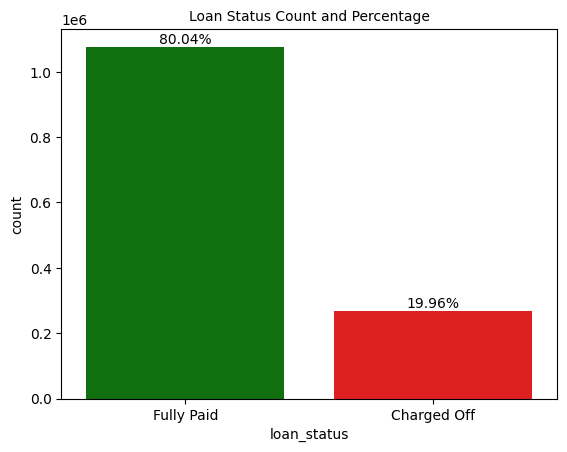

In [143]:
# Create a countplot to visualize the count of Fully Paid and Charged Off loan_status
ax = sns.countplot(x='loan_status', data=df_filtered, palette={'Fully Paid':'green', 'Charged Off':'red'}) 

for p in ax.patches:
    ax.annotate(
        '{}%'.format(round(p.get_height() / len(df_filtered) * 100, 2)),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        xytext=(0,0),
        textcoords='offset points'
    )
    
ax.set_title('Loan Status Count and Percentage', size=10)

In [12]:
# Calculate the percentage of Charged Off lenders
percent_charged_off = (df_filtered['loan_status'].value_counts()['Charged Off']  / len(df_filtered)) * 100

percent_charged_off

19.962610848057324

The percentage of `Charged Off` lenders is around 20%. Assuming the decision to lend was decided by a human, this can mean that the probability of that person approving a loan to a lender who is proned to `Charged Off` is around 20%?

### Feature selection

To accurately predict if a loan will be `Fully Paid` or `Charged Off` at the application stage, prior to loan approval, we will eliminate any columns with information that becomes available only after the loan is approved.

In [13]:
# Post-approval columns
post_approval_col = [
    'avg_cur_bal', 'total_rev_hi_lim', 'collection_recovery_fee', 'recoveries', 
    'collections_12_mths_ex_med', 'total_bal_ex_mort', 'num_rev_accts', 'last_pymnt_amnt', 
    'url', 'chargeoff_within_12_mths', 'percent_bc_gt_75', 'title', 'mths_since_recent_bc', 
    'pymnt_plan', 'tot_cur_bal', 'addr_state', 'num_tl_90g_dpd_24m', 'total_pymnt', 
    'last_credit_pull_d', 'total_pymnt_inv', 'tax_liens', 'mo_sin_rcnt_rev_tl_op', 'num_bc_tl', 
    'num_tl_120dpd_2m', 'pct_tl_nvr_dlq', 'bc_util', 'delinq_amnt', 'bc_open_to_buy', 
    'mo_sin_old_rev_tl_op', 'funded_amnt', 'num_actv_bc_tl', 'disbursement_method', 
    'num_op_rev_tl', 'last_fico_range_high', 'acc_open_past_24mths', 'installment', 
    'delinq_2yrs', 'funded_amnt_inv', 'num_accts_ever_120_pd', 'initial_list_status', 
    'inq_last_6mths', 'num_tl_op_past_12m', 'out_prncp', 'last_fico_range_low', 'out_prncp_inv', 
    'tot_hi_cred_lim', 'tot_coll_amt', 'total_rec_prncp', 'num_tl_30dpd', 'last_pymnt_d', 
    'total_rec_late_fee', 'acc_now_delinq', 'num_il_tl', 'num_actv_rev_tl', 'num_bc_sats', 
    'total_rec_int', 'hardship_flag', 'total_bc_limit', 'mths_since_recent_inq', 
    'mo_sin_old_il_acct', 'id', 'debt_settlement_flag', 'mo_sin_rcnt_tl', 'num_sats', 
    'total_il_high_credit_limit', 'num_rev_tl_bal_gt_0'
]

# Drop post-approval columns
df_pre_approval = df_filtered.drop(columns = post_approval_col)
dropped_columns_count = len(post_approval_col)

print('After dropping features containing post-approval information, we are left with {} features.'.format(df_pre_approval.shape[1]))

After dropping features containing post-approval information, we are left with 85 features.


In [14]:
# Calculate the percentage of null values in the remaining 85 features.
null_percentage = (df_pre_approval.isnull().sum() / len(df_pre_approval)) * 100

null_percentage

member_id                100.000000
loan_amnt                  0.000000
term                       0.000000
int_rate                   0.000000
grade                      0.000000
                            ...    
settlement_status         97.526518
settlement_date           97.526518
settlement_amount         97.526518
settlement_percentage     97.526518
settlement_term           97.526518
Length: 85, dtype: float64

In [15]:
# Define a certain null_percentage threshold
threshold = 20

# Find the columns that have nul_percentage higher than the threshold
columns_to_drop = null_percentage[null_percentage >= threshold].index

# Drop the columns with the high null_percentage from the dataframe
df_cleaned = df_pre_approval.drop(columns = columns_to_drop)

print('Dropping features with more than {}% null values left us with {} features to choose from.'.format(threshold, df_cleaned.shape[1]))

Dropping features with more than 20% null values left us with 27 features to choose from.


In [16]:
remaining_features = df_cleaned.columns.tolist()

remaining_features

['loan_amnt',
 'term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'zip_code',
 'dti',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'policy_code',
 'application_type',
 'mort_acc',
 'pub_rec_bankruptcies']

In [17]:
#Converting 'issue_d' column to datetime object.

df_cleaned['issue_d'] = pd.to_datetime(df_cleaned['issue_d']) 

## Macroeconomic Datasets

**Goal**: Many previous papers studying on Lending Club dataset have pointed out that macroeconomic factors, specifically GDP, inflation rates, and unemployment rates, are significant determinants that affect loan performance. Therefore, upon exploring these datasets in conjunction with Lending Club dataset, I expect to find out whether these factors are correlated with the remaining features in the previous section, and thus, whether they will increase the performance of my classification model.

### Converting `DATE` column to datetime object

In [18]:
df_GDP['DATE'] = pd.to_datetime(df_GDP['DATE'])
df_infl_rate['DATE'] = pd.to_datetime(df_infl_rate['DATE'])
df_unemp_rate['DATE'] = pd.to_datetime(df_unemp_rate['DATE'])

### Checking if there are null values

In [19]:
df_GDP.isnull().sum()

DATE    0
GDP     0
dtype: int64

In [20]:
df_infl_rate.isnull().sum()

DATE              0
FPCPITOTLZGUSA    0
dtype: int64

In [21]:
df_unemp_rate.isnull().sum()

DATE      0
UNRATE    0
dtype: int64

# Macroeconomic feature engineering

As the entries in Lending Club's dataset start from 2007 to 2018, we will only consider entries within this period for GDP, inflation rate, and unemployment rate datasets.

In [22]:
df_GDP = df_GDP[(df_GDP['DATE'].dt.year >= 2007) & (df_GDP['DATE'].dt.year <= 2018)]
df_infl_rate = df_infl_rate[(df_infl_rate['DATE'].dt.year >= 2007) & (df_infl_rate['DATE'].dt.year <= 2018)]
df_unemp_rate = df_unemp_rate[(df_unemp_rate['DATE'].dt.year >= 2007) & (df_unemp_rate['DATE'].dt.year <= 2018)]

GDP on its own offers a snapshot of economic size, but not the economy's momentum or direction of change. Using GDP growth can better anticipate how changing economic conditions might influence borrowers' ability to repay loans. Therefore, we will calculate GDP growth based on the given dataset.

In [23]:
df_GDP.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 240 to 287
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    48 non-null     datetime64[ns]
 1   GDP     48 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


In [24]:
df_GDP['GDP_growth'] = ((df_GDP['GDP'] - df_GDP['GDP'].shift(1)) / df_GDP['GDP'].shift(1))

In [25]:
df_GDP.head()

,DATE,GDP,GDP_growth
240,2007-01-01,14215.651,NaN
241,2007-04-01,14402.082,0.013114
242,2007-07-01,14564.117,0.011251
243,2007-10-01,14715.058,0.010364
244,2008-01-01,14706.538,-0.000579


### Merging GDP dataset with Lending Club dataset

In [26]:
#Creating a 'quarter' column for Lending Club dataset.

df_cleaned['quarter'] = df_cleaned['issue_d'].dt.to_period('Q').dt.start_time

In [27]:
#Creating a 'quarter' column for GDP dataset.

df_GDP['quarter'] = df_GDP['DATE'].dt.to_period('Q').dt.start_time

In [28]:
#Dropping unused data in GDP dataset.

df_GDP = df_GDP.drop(columns=['DATE', 'GDP'])

In [29]:
#Merging GDP dataset with Lending Clube dataset.

df_merged = pd.merge(df_cleaned, df_GDP, how='inner', on='quarter')

### Merging inflation rate dataset with Lending Club dataset

In [30]:
#Creating a `year` column for Lending Club dataset.

df_merged['year'] = df_merged['issue_d'].dt.to_period('Y')

In [31]:
#Creating a `year` column for inflation rate dataset.

df_infl_rate['year'] = df_infl_rate['DATE'].dt.to_period('Y')

In [32]:
#Dropping unused data in inflation rate dataset.

df_infl_rate = df_infl_rate.drop(columns=['DATE'])

In [33]:
#Merging inflation rate dataset with Lending Club dataset.

df_merged = pd.merge(df_merged, df_infl_rate, how='inner', on='year')

### Merging unemployment rate dataset with Lending Club dataset

In [34]:
#Creating a `month` column for Lending Club dataset.

df_merged['month'] = df_merged['issue_d'].dt.to_period('M')

In [35]:
#Creating a `month` column for unemployment rate dataset.

df_unemp_rate['month'] = df_unemp_rate['DATE'].dt.to_period('M')

In [36]:
#Dropping unused data in unemployment rate dataset.

df_unemp_rate = df_unemp_rate.drop(columns=['DATE'])

In [37]:
#Merging unemployment rate dataset with Lending Club dataset.

df_merged = pd.merge(df_merged, df_unemp_rate, how='inner', on='month')

In [38]:
#Renaming merged columns.

df_merged = df_merged.rename(columns={'FPCPITOTLZGUSA' : 'inflation_rate', 'UNRATE' : 'unemp_rate'})

In [39]:
#Dropping unused mapping columns in Lending Club dataset.

df_final = df_merged.drop(columns=['quarter', 'month', 'year'])

In [40]:
df_final.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,revol_bal,revol_util,total_acc,policy_code,application_type,mort_acc,pub_rec_bankruptcies,GDP_growth,inflation_rate,unemp_rate
0,3600.0,36 months,13.99,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,...,2765.0,29.7,13.0,1.0,Individual,1.0,0.0,0.001821,0.118627,5.0
1,24700.0,36 months,11.99,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,...,21470.0,19.2,38.0,1.0,Individual,4.0,0.0,0.001821,0.118627,5.0
2,20000.0,60 months,10.78,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,...,7869.0,56.2,18.0,1.0,Joint App,5.0,0.0,0.001821,0.118627,5.0
3,10400.0,60 months,22.45,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,...,21929.0,64.5,35.0,1.0,Individual,6.0,0.0,0.001821,0.118627,5.0
4,11950.0,36 months,13.44,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,Source Verified,...,8822.0,68.4,6.0,1.0,Individual,0.0,0.0,0.001821,0.118627,5.0


# Exploratory Data Analysis

In [41]:
df_final.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'zip_code', 'dti',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'policy_code',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'GDP_growth',
       'inflation_rate', 'unemp_rate'],
      dtype='object')

In [42]:
df_final.dtypes

loan_amnt                      float64
term                            object
int_rate                       float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
dti                            float64
earliest_cr_line                object
fico_range_low                 float64
fico_range_high                float64
open_acc                       float64
pub_rec                        float64
revol_bal                      float64
revol_util                     float64
total_acc                      float64
policy_code                    float64
application_type                object
mort_acc                 

In [43]:
#Function to remove outliers for better visualizations.

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

## Qualitative features

`term`

Text(0.5, 1.0, 'Loan Count By Term')

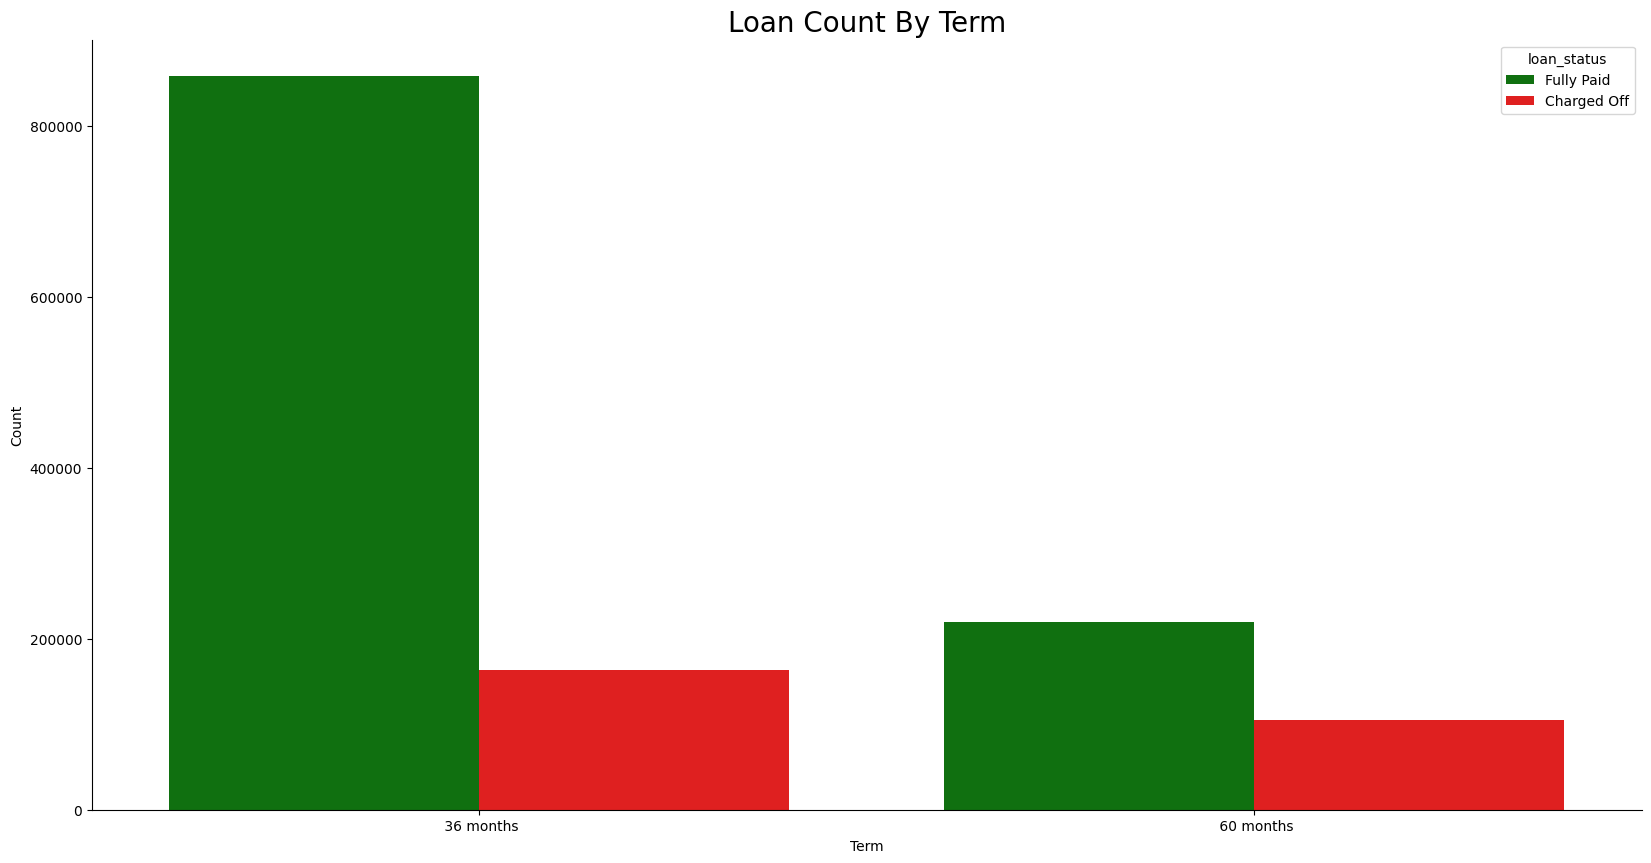

In [44]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.despine()
order = sorted(df_final['term'].unique())
sns.countplot(data=df_final, x='term', hue='loan_status', order=order, palette={'Fully Paid':'green', 'Charged Off':'red'})

ax.set(xlabel='Term', ylabel='Count')
ax.set_title('Loan Count By Term', size=20)

Based on the graph, although the total number of loans applied for 60 months are significantly lower, the percentage of loan charged-off for this category is higher. 

`grade`

Text(0.5, 1.0, 'Loan count by grade')

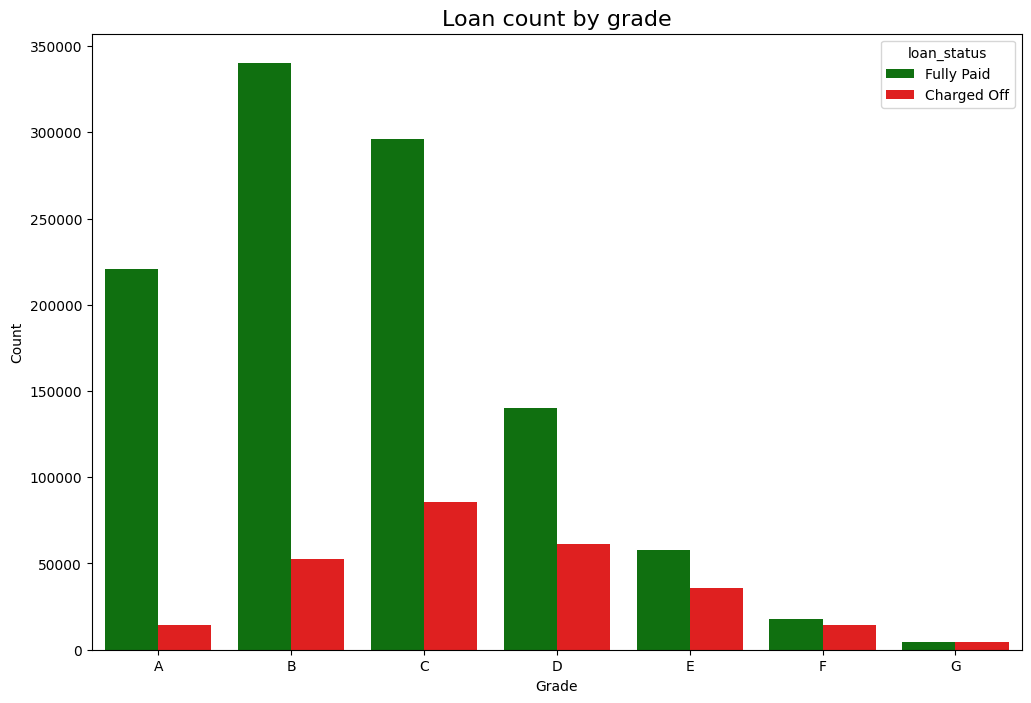

In [45]:
fig, ax = plt.subplots(figsize=(12, 8))

grades = df_final['grade'].unique()

grades = [grade for grade in grades if type(grade) != float]

order = sorted(grades) 

sns.countplot(data=df_final, x='grade', hue='loan_status', order=order, palette={'Fully Paid':'green', 'Charged Off':'red'})

ax.set(xlabel='Grade', ylabel='Count')
ax.set_title('Loan count by grade', size=16)

From the graph above, we cannot observe the percentage of charged-off loan for each grade. Therefore, we create a table to calculate it.

In [46]:
df_charged_off = df_final[df_final['loan_status'] == 'Charged Off'].groupby('grade').count()[['loan_status']]

df_total = df_final.groupby('grade').count()[['loan_status']]

percent_co = df_charged_off / df_total * 100

percent_co.rename(columns={'loan_status': 'Percentage Charged Off Loans'}).reset_index()

,grade,Percentage Charged Off Loans
0,A,6.040665
1,B,13.385157
2,C,22.439649
3,D,30.382229
4,E,38.478377
5,F,45.202446
6,G,49.934297


`Grade` is assigned by Lending Club for each loan based on the credit quality and underlying risk of the borrower, ranging from A for the highest to G for the lowest. Based on the table, it is obvious that the lower the grade, the higher the charged-off percentage.

`sub_grade`

Text(0.5, 1.0, 'Loan count by grade')

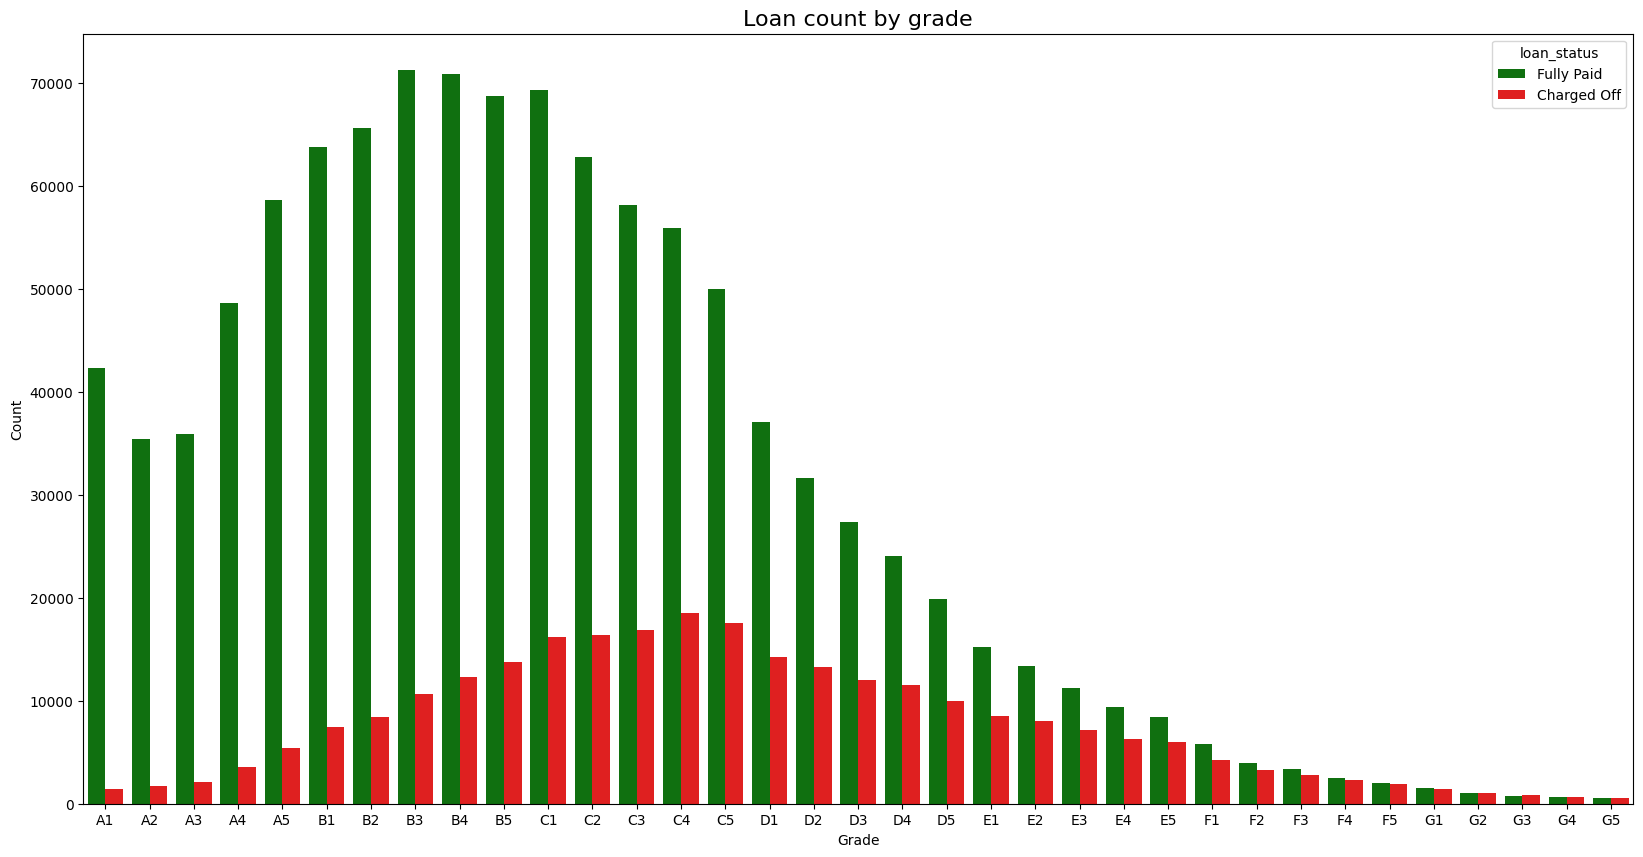

In [47]:
fig, ax = plt.subplots(figsize=(20, 10))

grades = df_final['sub_grade'].unique()

grades = [grade for grade in grades if type(grade) != float]

order = sorted(grades) 

sns.countplot(data=df_final, x='sub_grade', hue='loan_status', order=order, palette={'Fully Paid':'green', 'Charged Off':'red'})

ax.set(xlabel='Grade', ylabel='Count')
ax.set_title('Loan count by grade', size=16)

The graph above counts the number of `Fully paid` and `Charged Off` within each `sub_grade`. However, we cannot observe the percentage of each category within each `sub_grade`. Therefore, we create a table to calculate this.

In [48]:
df_charged_off = df_final[df_final['loan_status'] == 'Charged Off'].groupby('sub_grade').count()[['loan_status']]

df_total = df_final.groupby('sub_grade').count()[['loan_status']]

percent_co = df_charged_off / df_total * 100

percent_co.rename(columns={'loan_status': 'Percentage Charged Off Loans'}).reset_index()

,sub_grade,Percentage Charged Off Loans
0,A1,3.223591
1,A2,4.664049
2,A3,5.508475
3,A4,6.867043
4,A5,8.404294
5,B1,10.421205
6,B2,11.359829
7,B3,12.983490
8,B4,14.827101
9,B5,16.701398


From the table, it is obvious that the lower the grade, the higher the percentage of loan charged off. 
Since `sub_grade` and `grade` represent the same information, but `sub_grade` is more detailed. Therefore, we will only keep `sub_grade` for our model.

`emp_title`

In [49]:
# Display the unique employment title
df_final['emp_title'].value_counts()

emp_title
Teacher                          21268
Manager                          19470
Owner                            10302
Registered Nurse                  8774
RN                                8522
                                 ...  
CSR. SR                              1
Auto body prepper                    1
Software engineer supervisor         1
Ins Adjuster                         1
Exec Dir Internal Audit              1
Name: count, Length: 378353, dtype: int64

There are 378,353 unique employment titles. This might be way too much for any further processing, remove this feature in data pre-processing section.

`emp_length`

Text(0.5, 1.0, 'Loan count by employment length')

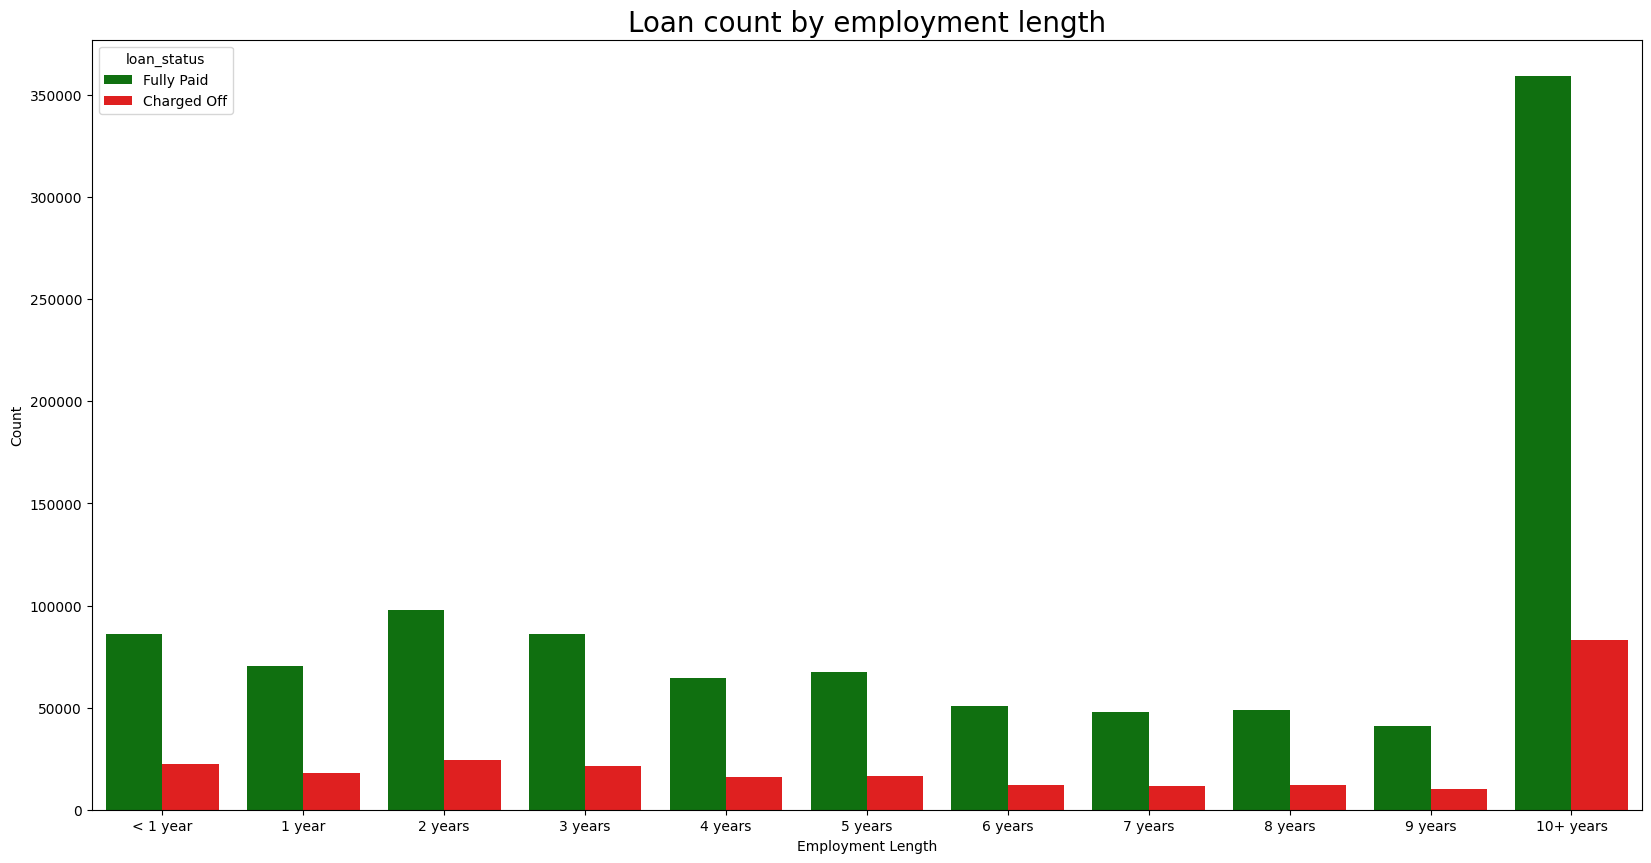

In [50]:
fig, ax = plt.subplots(figsize=(20,10))

order = [
    '< 1 year',
    '1 year',
    '2 years',
    '3 years',
    '4 years',
    '5 years',
    '6 years',
    '7 years',
    '8 years',
    '9 years',
    '10+ years'
]

sns.countplot(data=df_final, x='emp_length', hue='loan_status', order=order, palette={'Fully Paid':'green', 'Charged Off':'red'})

ax.set(xlabel='Employment Length', ylabel='Count')
ax.set_title('Loan count by employment length', size=20)

Based on the graph, we cannot observe the charged-off percentage for each category. Therefore, we create a table to calculate it.

In [51]:
df_charged_off = df_final[df_final['loan_status'] == 'Charged Off'].groupby('emp_length').count()[['loan_status']]

df_total = df_final.groupby('emp_length').count()[['loan_status']]

percent_co = df_charged_off / df_total * 100

percent_co.rename(columns={'loan_status': 'Percentage Charged Off Loans'}).reset_index()

,emp_length,Percentage Charged Off Loans
0,1 year,20.564106
1,10+ years,18.782720
2,2 years,19.807299
3,3 years,19.968958
4,4 years,19.737822
5,5 years,19.600970
6,6 years,19.351856
7,7 years,19.488796
8,8 years,19.933774
9,9 years,19.901054


Based on the table, the charged-off percentage among employment lengths are around not significantly different (around 20%). Therefore, this feature might not be informative. Consider to drop this column when fitting the data into the model.

`home_ownership`

Text(0.5, 1.0, 'Loan Count By Home Ownership')

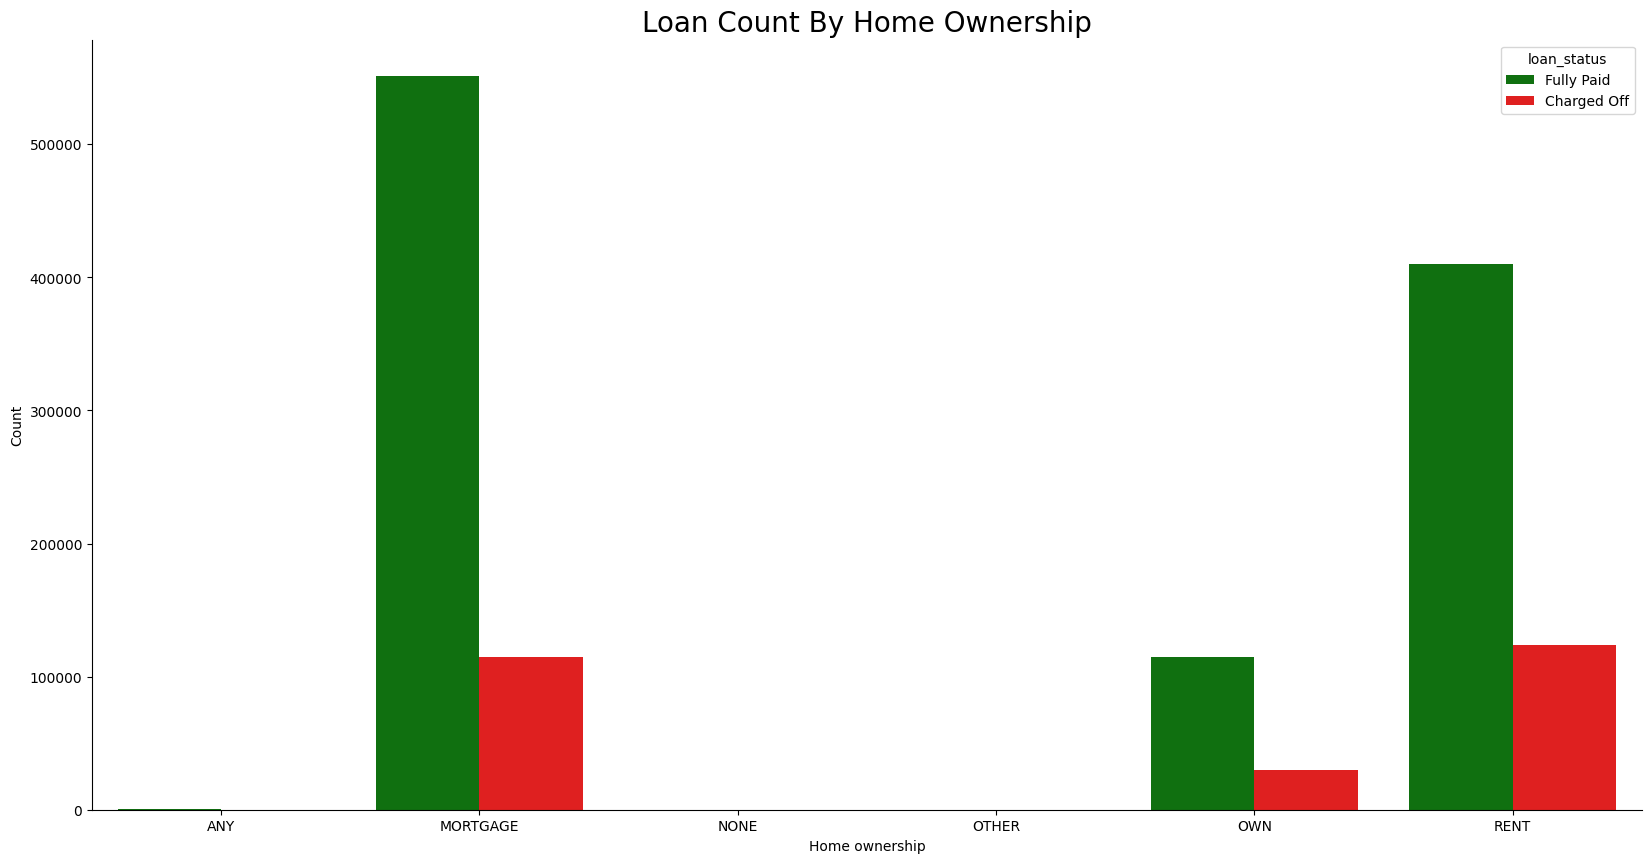

In [52]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.despine()
order = sorted(df_final['home_ownership'].unique())
sns.countplot(data=df_final, x='home_ownership', hue='loan_status', order=order, palette={'Fully Paid':'green', 'Charged Off':'red'})

ax.set(xlabel='Home ownership', ylabel='Count')
ax.set_title('Loan Count By Home Ownership', size=20)

We create a table to calculate the charged-off percentage within each category in the graph above.

In [53]:
df_charged_off = df_final[df_final['loan_status'] == 'Charged Off'].groupby('home_ownership').count()[['loan_status']]

df_total = df_final.groupby('home_ownership').count()[['loan_status']]

percent_co = df_charged_off / df_total * 100

percent_co.rename(columns={'loan_status': 'Percentage Charged Off Loans'}).reset_index()

,home_ownership,Percentage Charged Off Loans
0,ANY,19.580420
1,MORTGAGE,17.207724
2,NONE,14.583333
3,OTHER,18.750000
4,OWN,20.619753
5,RENT,23.216528


Based on the table, loan applications with rental house have the highest percentage of being charged-off.

`verification_status`

Text(0.5, 1.0, 'Loan count by verification status')

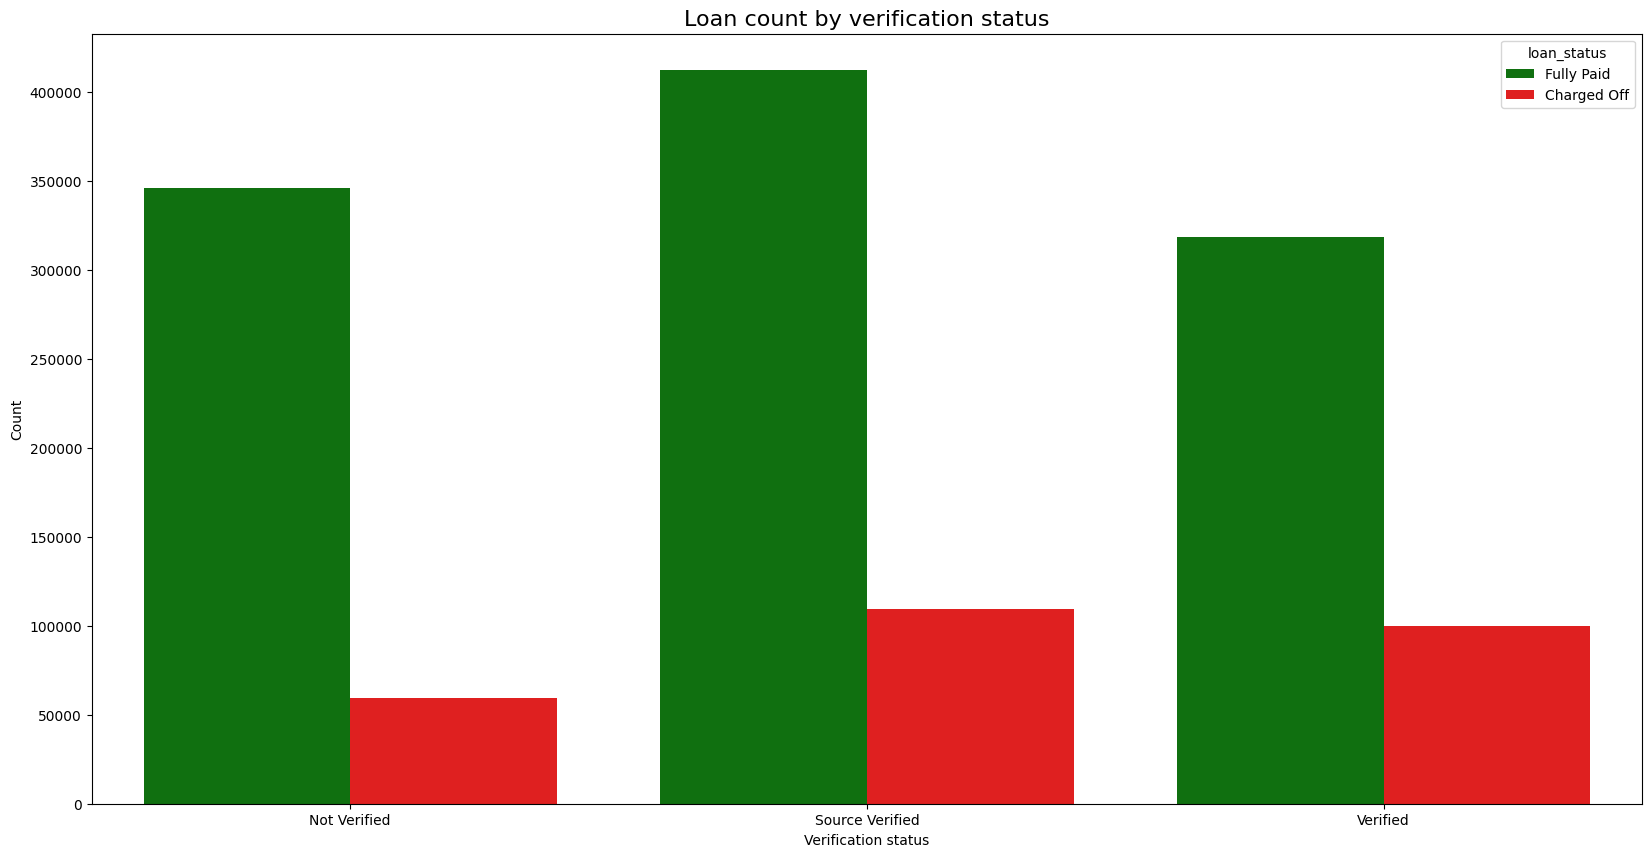

In [54]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.countplot(data=df_final, x='verification_status', hue='loan_status', palette={'Fully Paid':'green', 'Charged Off':'red'})

ax.set(xlabel='Verification status', ylabel='Count')
ax.set_title('Loan count by verification status', size=16)

We create a table to calculate the charged-off percentage for each category under `verification_status`

In [55]:
df_charged_off = df_final[df_final['loan_status'] == 'Charged Off'].groupby('verification_status').count()[['loan_status']]

df_total = df_final.groupby('verification_status').count()[['loan_status']]

percent_co = df_charged_off / df_total * 100

percent_co.rename(columns={'loan_status': 'Percentage Charged Off Loans'}).reset_index()

,verification_status,Percentage Charged Off Loans
0,Not Verified,14.674600
1,Source Verified,20.954855
2,Verified,23.854509


`verification_status` is to seek for income source verification. It is interesting that applications with verified status have the highest percentage of being charged-off.

`purpose`

Text(0.5, 1.0, 'Loan count by purpose')

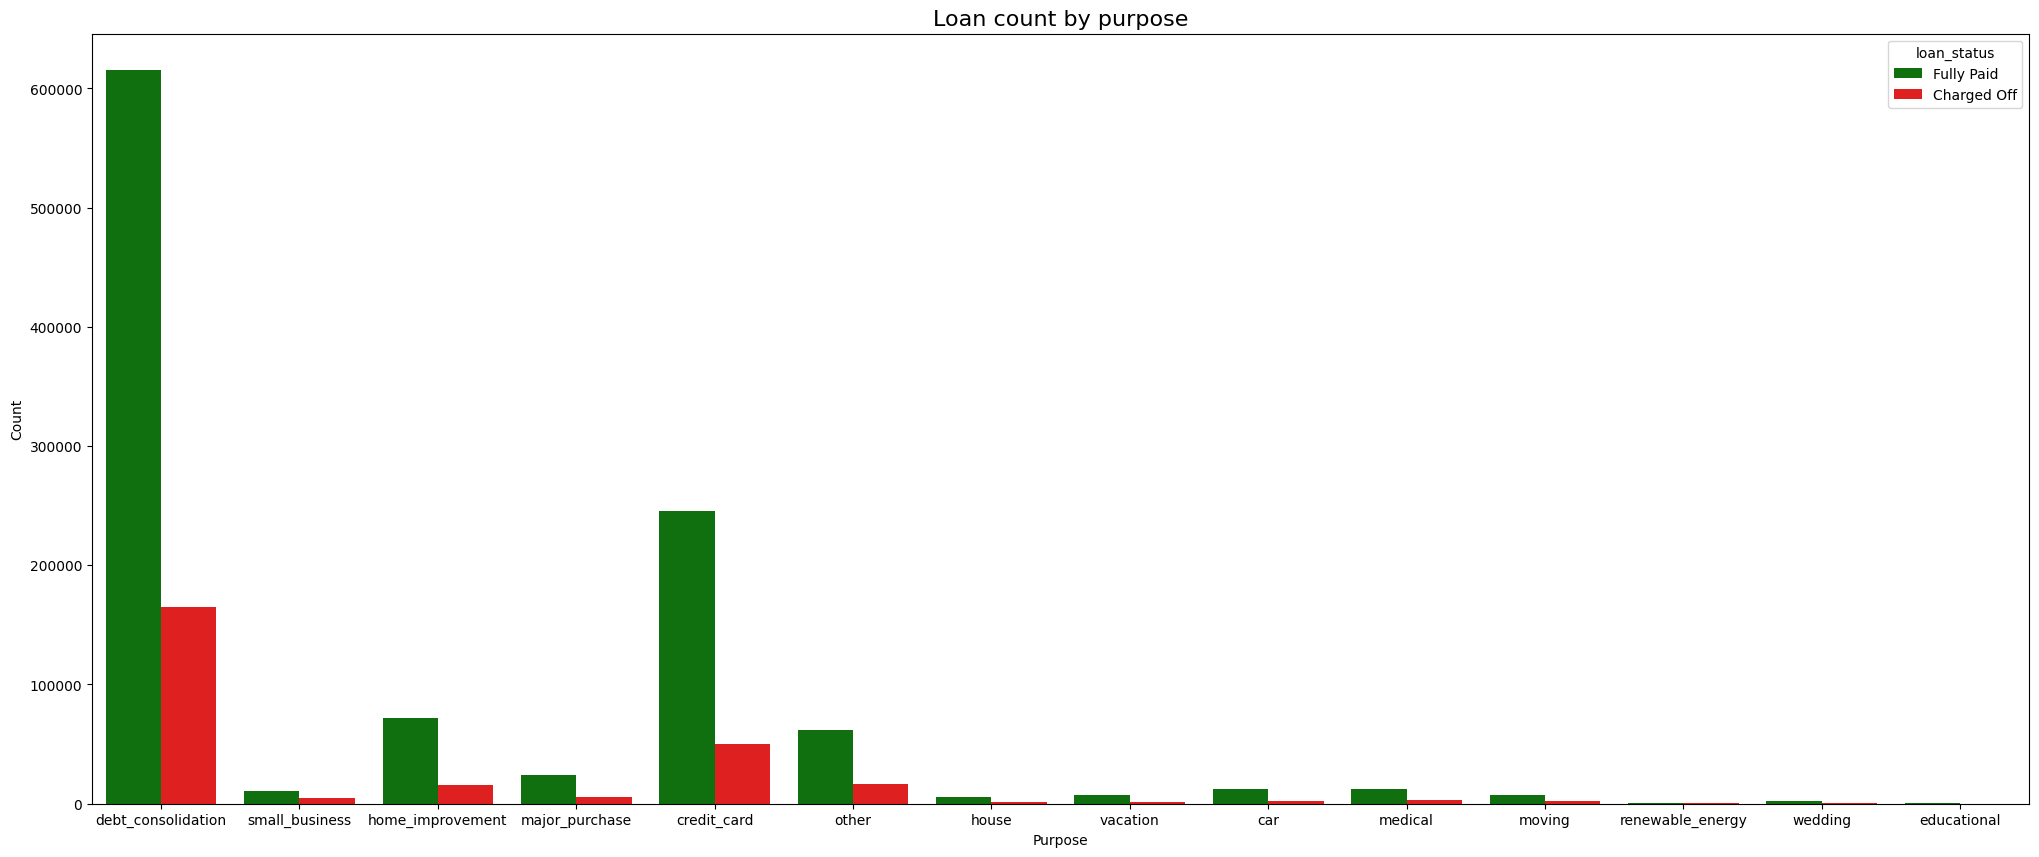

In [56]:
fig, ax = plt.subplots(figsize=(25, 10))

sns.countplot(data=df_final, x='purpose', hue='loan_status', palette={'Fully Paid':'green', 'Charged Off':'red'})

ax.set(xlabel='Purpose', ylabel='Count')
ax.set_title('Loan count by purpose', size=16)

We create a table to calculate the charged-off percentage within each `purpose`.

In [57]:
df_charged_off = df_final[df_final['loan_status'] == 'Charged Off'].groupby('purpose').count()[['loan_status']]

df_total = df_final.groupby('purpose').count()[['loan_status']]

percent_co = df_charged_off / df_total * 100

percent_co.rename(columns={'loan_status': 'Percentage Charged Off Loans'}).reset_index()

,purpose,Percentage Charged Off Loans
0,car,14.679465
1,credit_card,16.927042
2,debt_consolidation,21.146938
3,educational,17.177914
4,home_improvement,17.715762
5,house,21.880601
6,major_purchase,18.599830
7,medical,21.775749
8,moving,23.354430
9,other,21.040128


From the table, `small_business` has the highest charged-off percentage.

`zip_code`

In [58]:
# Display the unique zip codes
df_final['zip_code'].value_counts()

zip_code
945xx    15005
750xx    14474
112xx    13829
606xx    12433
300xx    12124
         ...  
095xx        1
009xx        1
872xx        1
513xx        1
525xx        1
Name: count, Length: 943, dtype: int64

Text(0.5, 1.0, 'Loan count by zip code')

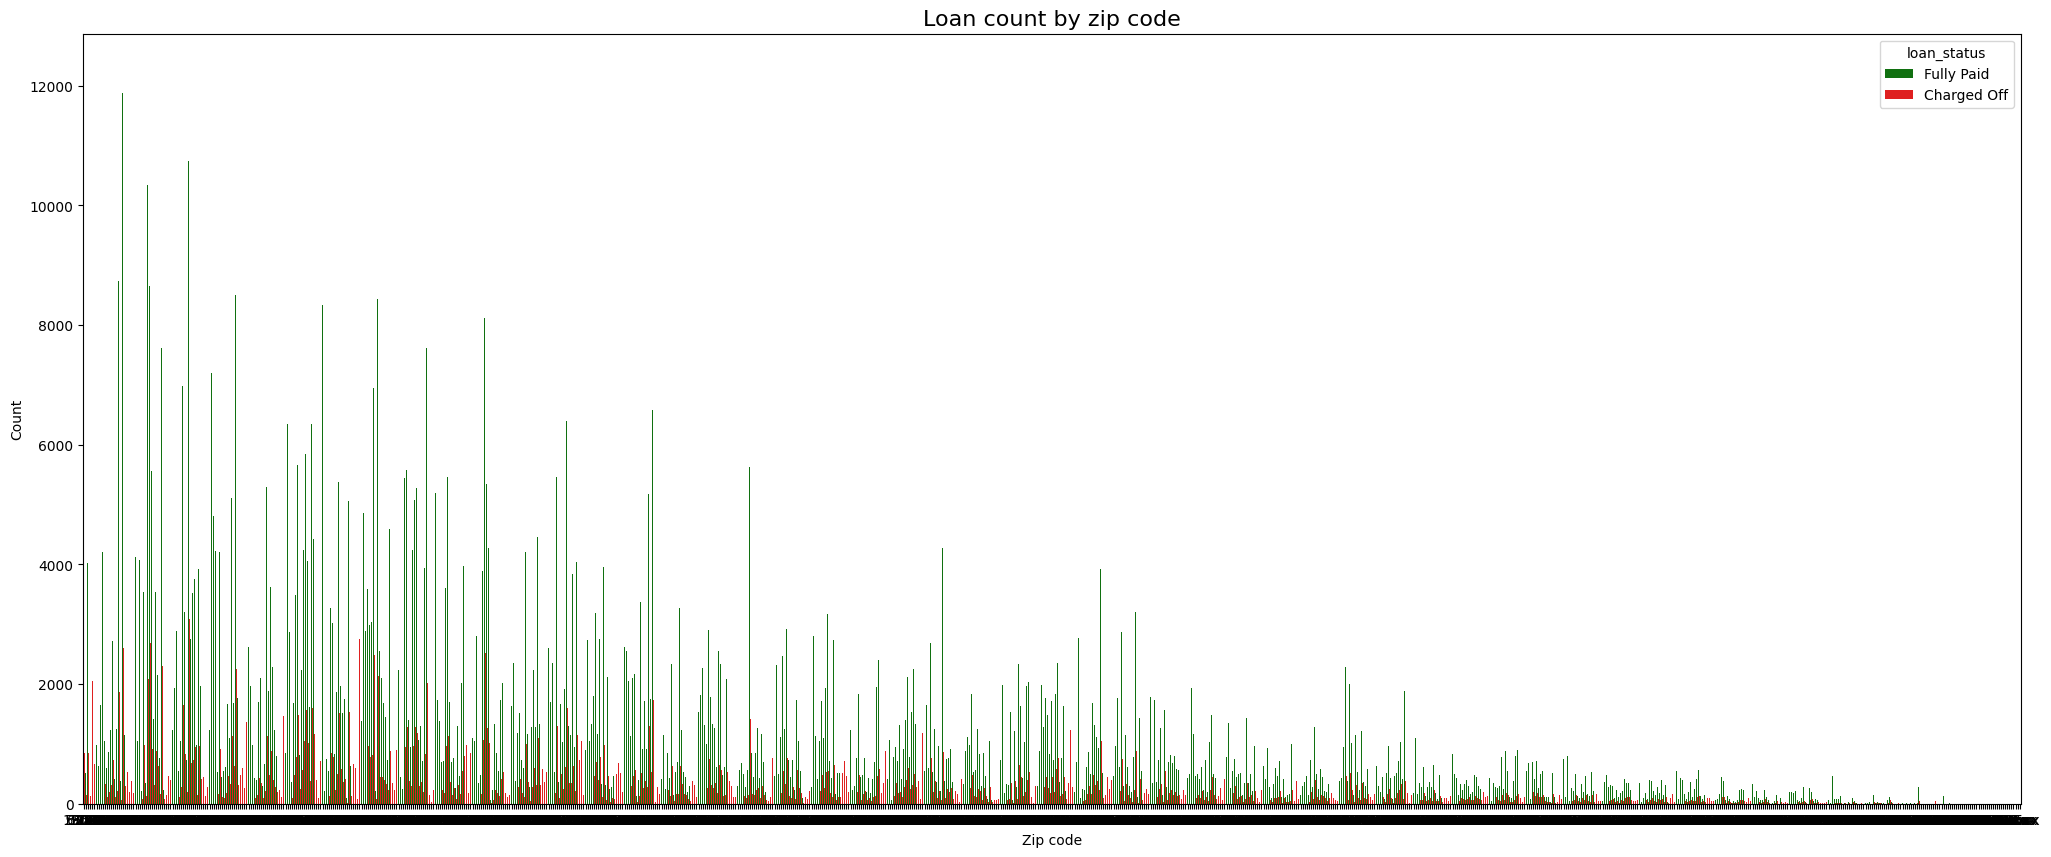

In [59]:
fig, ax = plt.subplots(figsize=(25, 10))

sns.countplot(data=df_final, x='zip_code', hue='loan_status', palette={'Fully Paid':'green', 'Charged Off':'red'})

ax.set(xlabel='Zip code', ylabel='Count')
ax.set_title('Loan count by zip code', size=16)

There are too many unique entries and therefore, it is unlikely that `zip_code` is informative for the classification purpose. We will drop this feature later.

`earliest_cr_line`

`earliest_cr_line` is not very informative by itself. However, we can engineer a new column that represent the credit length by taking the difference in year between `issue_d` and `earliest_cr_line`.

`application_type`

Text(0.5, 1.0, 'Loan count by application type')

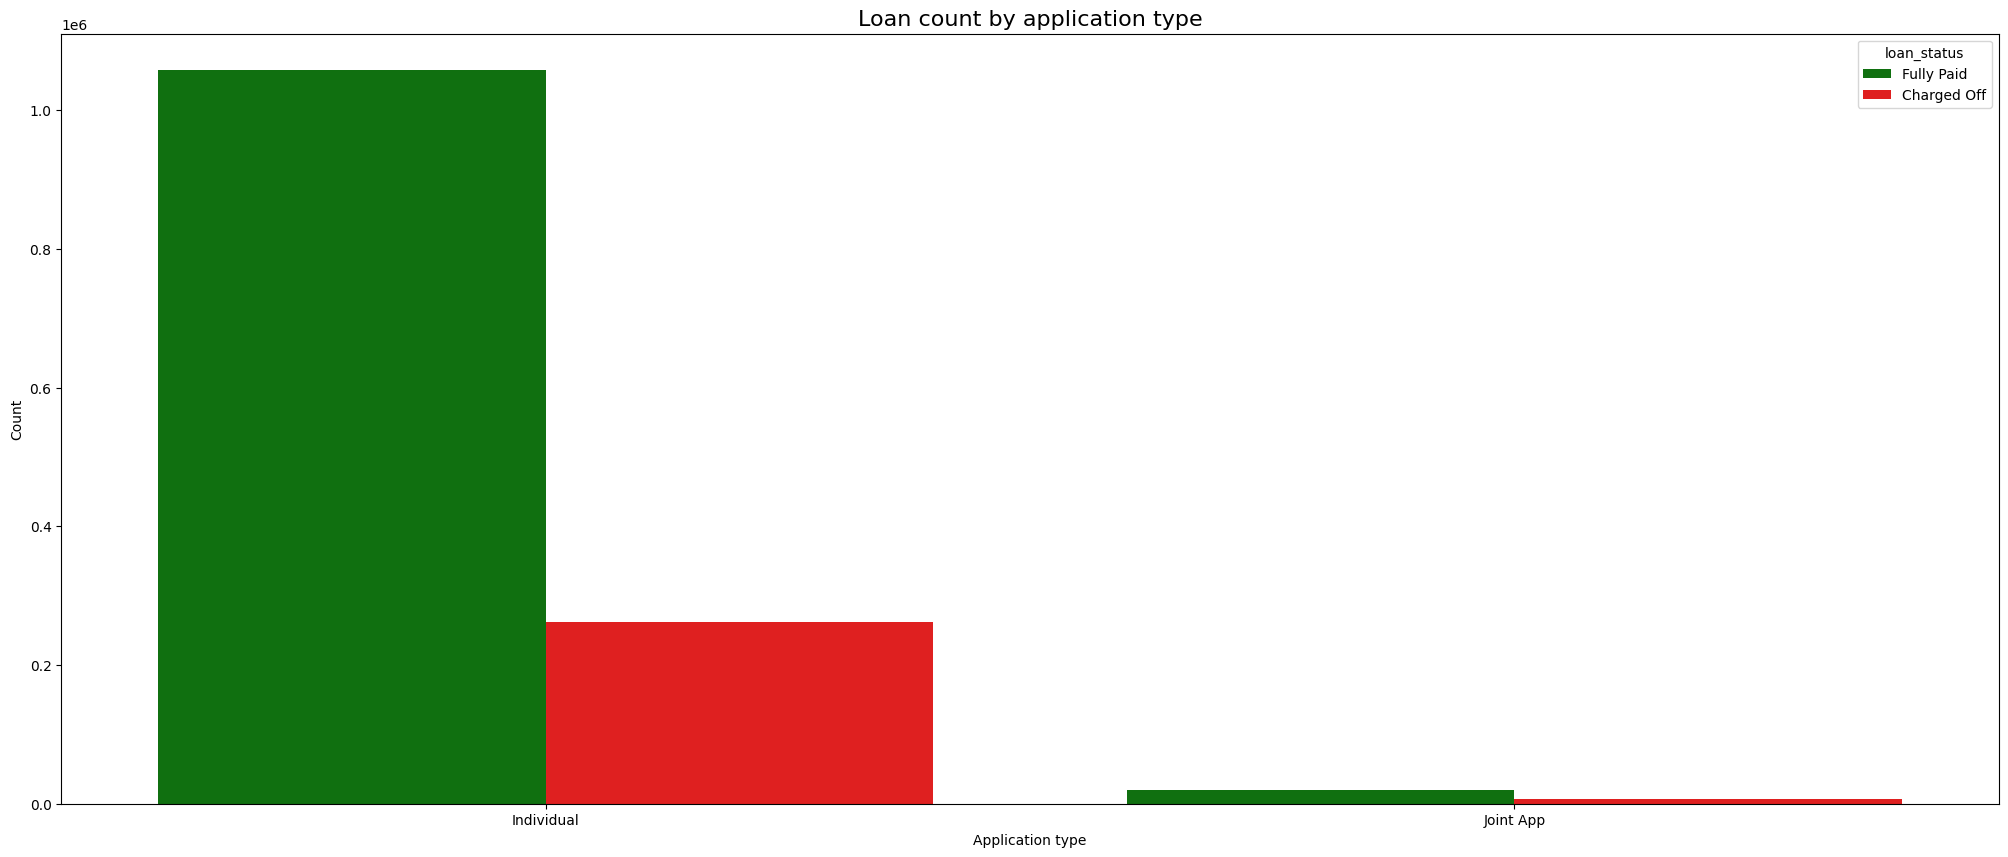

In [60]:
fig, ax = plt.subplots(figsize=(25, 10))

sns.countplot(data=df_final, x='application_type', hue='loan_status', palette={'Fully Paid':'green', 'Charged Off':'red'})

ax.set(xlabel='Application type', ylabel='Count')
ax.set_title('Loan count by application type', size=16)

We create a table to calculate the charged-off percentage for each type of loan applications.

In [61]:
df_charged_off = df_final[df_final['loan_status'] == 'Charged Off'].groupby('application_type').count()[['loan_status']]

df_total = df_final.groupby('application_type').count()[['loan_status']]

percent_co = df_charged_off / df_total * 100

percent_co.rename(columns={'loan_status': 'Percentage Charged Off Loans'}).reset_index()

,application_type,Percentage Charged Off Loans
0,Individual,19.872150
1,Joint App,24.589147


Based on the table, it is interesting that joint applications have the higher charged-off percentage compared to individual ones.

## Quantitative features

`loan_amnt`

In [62]:
df_final['loan_amnt'].describe()

count    1.345310e+06
mean     1.441997e+04
std      8.717051e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

[Text(0.5, 0, 'Loan Status'), Text(0, 0.5, 'Amount in USD')]

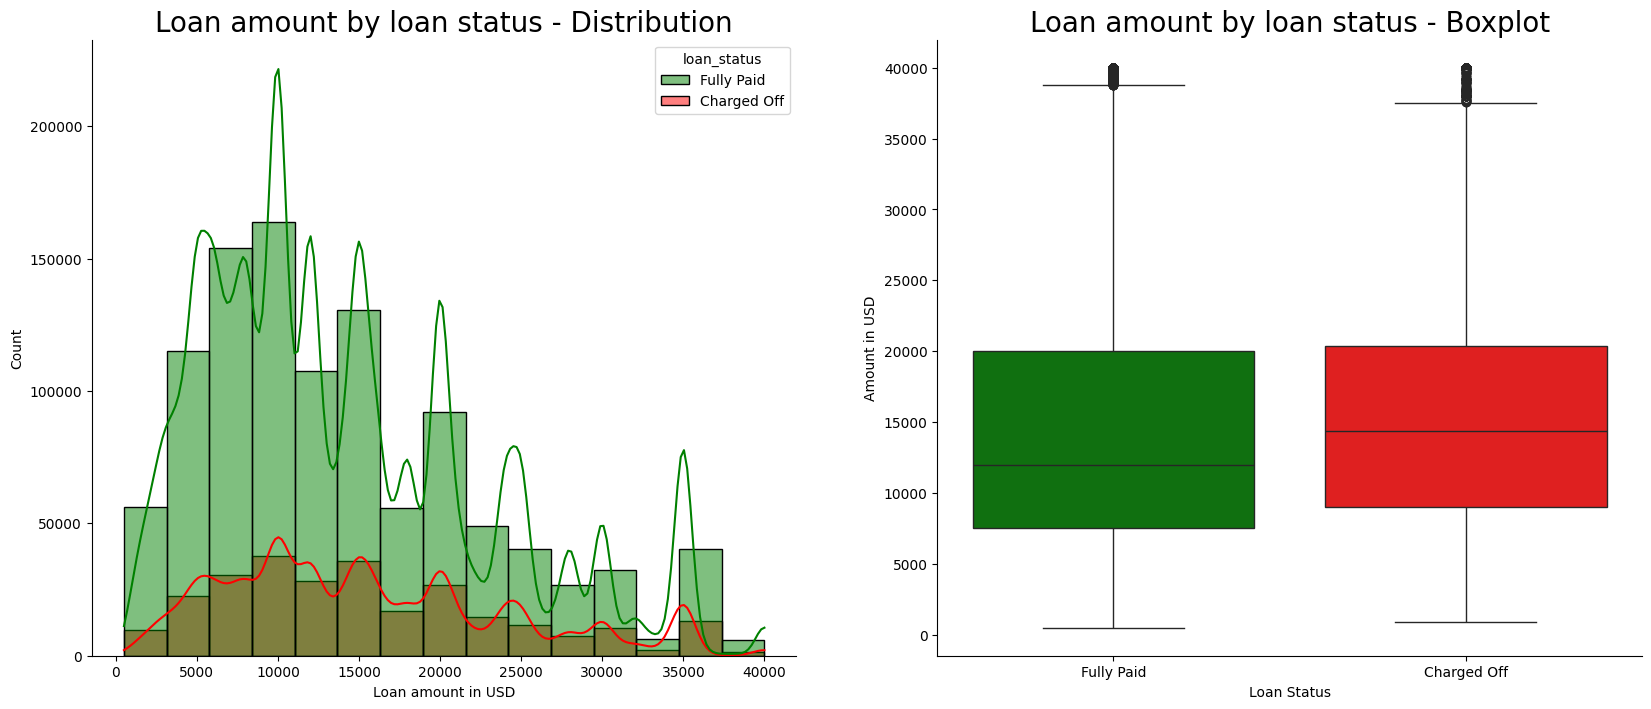

In [63]:
# Loan amount count by loan status

fig, ax =plt.subplots(1,2,figsize=(20,8))

sns.despine()

ax[0].tick_params(axis='x', labelrotation=0)
ax[0].set(xlabel='Loan amount in USD', ylabel='')
ax[0].set_title('Loan amount by loan status - Distribution', size=20)
ax[1].tick_params(axis='x', labelrotation=0)
ax[1].set_title('Loan amount by loan status - Boxplot', size=20)

sns.histplot(data=df_final,x='loan_amnt',hue='loan_status',bins=15,
             kde=True,ax=ax[0], palette = {'Fully Paid': 'green', 'Charged Off': 'red'})
sns.boxplot(data=df_final,x='loan_status',y='loan_amnt',ax=ax[1], palette = {'Fully Paid': 'green', 'Charged Off': 'red'}).set(xlabel='Loan Status',
                                                                                                                               ylabel='Amount in USD')

The distribution of `loan_amnt` for both loan status is slightly skewed to the right and have a moderate numbers of outliers.

`int_rate`

In [64]:
df_final['int_rate'].describe()

count    1.345310e+06
mean     1.323962e+01
std      4.768716e+00
min      5.310000e+00
25%      9.750000e+00
50%      1.274000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

[Text(0.5, 0, 'Loan Status'), Text(0, 0.5, 'Interest rate in %')]

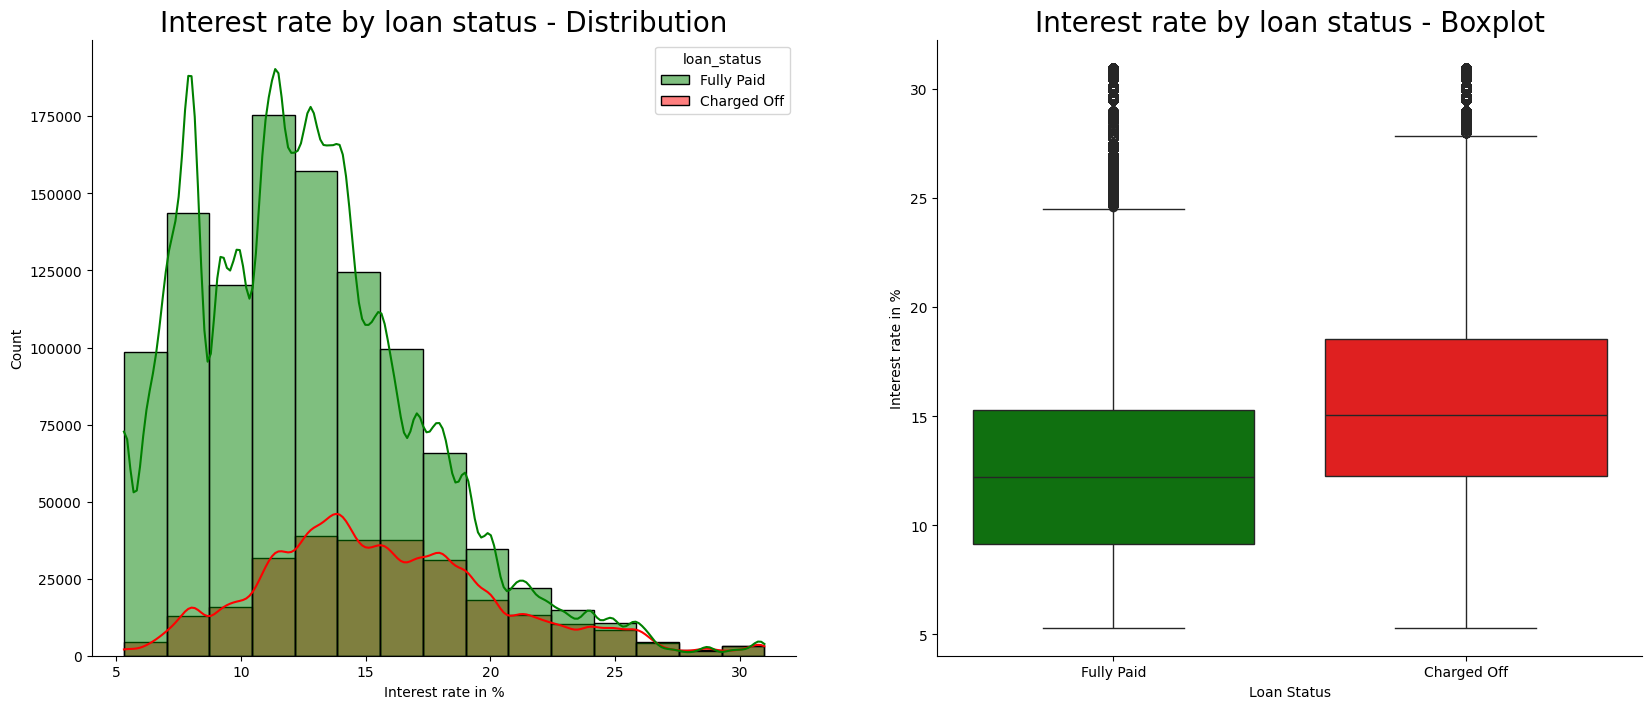

In [65]:
# Interest rate count by loan status

fig, ax =plt.subplots(1,2,figsize=(20,8))

sns.despine()

ax[0].tick_params(axis='x', labelrotation=0)
ax[0].set(xlabel='Interest rate in %', ylabel='')
ax[0].set_title('Interest rate by loan status - Distribution', size=20)
ax[1].tick_params(axis='x', labelrotation=0)
ax[1].set_title('Interest rate by loan status - Boxplot', size=20)


sns.histplot(data=df_final,x='int_rate',hue='loan_status',bins=15,
             kde=True,ax=ax[0], palette = {'Fully Paid': 'green', 'Charged Off': 'red'})

sns.boxplot(data=df_final,x='loan_status',y='int_rate',ax=ax[1], palette = {'Fully Paid': 'green', 'Charged Off': 'red'}).set(xlabel='Loan Status',
                                                                                                                              ylabel='Interest rate in %')

While the distribution of `int_rate` for `Fully Paid` loan applications is slightly skewed to the right, that for `Charged Off` ones is approximately normal. This feature for both `loan_status` has moderate numbers of outliers.

`annual_inc`

In [66]:
df_final['annual_inc'].describe()

count    1.345310e+06
mean     7.624764e+04
std      6.992510e+04
min      0.000000e+00
25%      4.578000e+04
50%      6.500000e+04
75%      9.000000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64

[Text(0.5, 0, 'Loan Status'), Text(0, 0.5, 'Annual inc. in USD')]

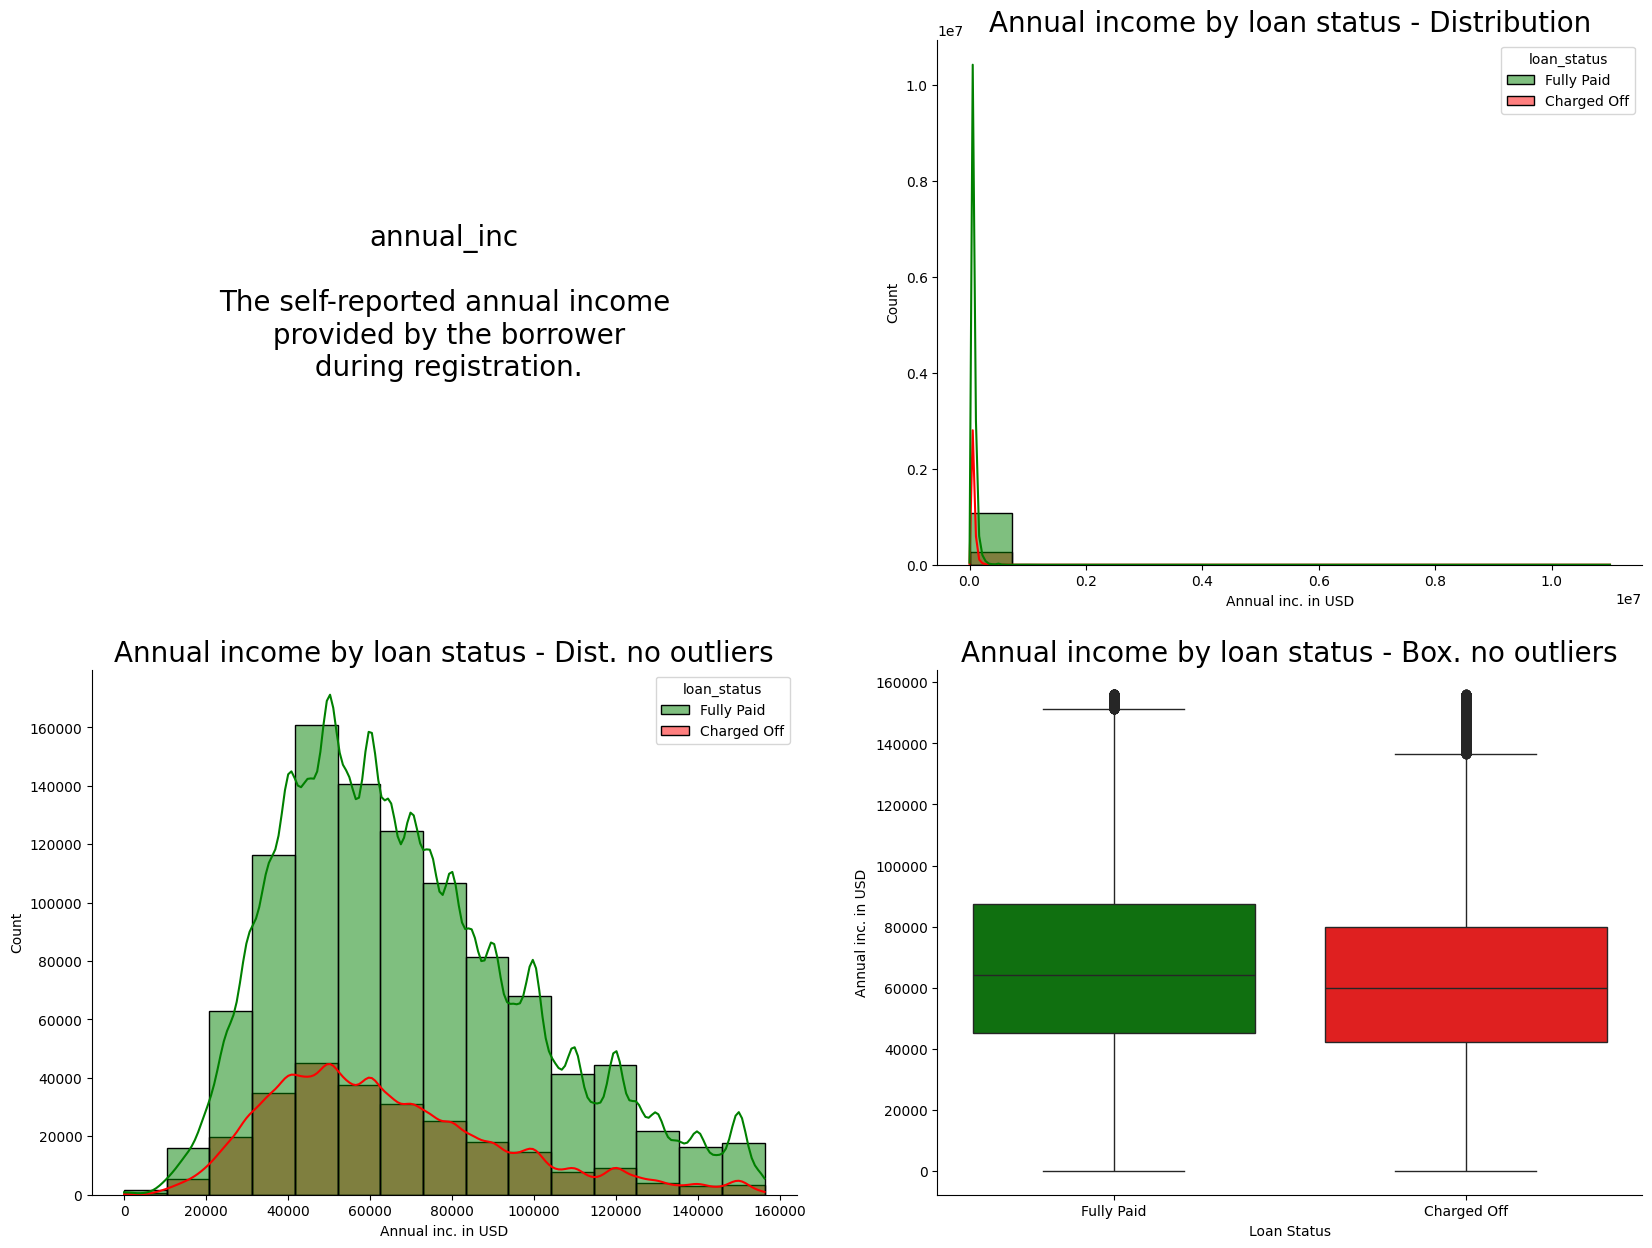

In [67]:
fig, ax =plt.subplots(2,2,figsize=(20,15))

sns.despine()

ax0 = fig.add_subplot(ax[0,0])
ax0.spines[:].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,'annual_inc\n\nThe self-reported annual income\n provided by the borrower\n during registration.',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=20,
         color='#000000')

ax[0,1].tick_params(axis='x', labelrotation=0)
ax[0,1].set(xlabel='Annual inc. in USD', ylabel='')
ax[0,1].set_title('Annual income by loan status - Distribution', size=20)
ax[1,0].tick_params(axis='x', labelrotation=0)
ax[1,0].set(xlabel='Annual inc. in USD', ylabel='')
ax[1,0].set_title('Annual income by loan status - Dist. no outliers', size=20)
ax[1,1].set_title('Annual income by loan status - Box. no outliers', size=20)

sns.histplot(data=df_final,x='annual_inc',hue='loan_status',bins=15,
             kde=True,ax=ax[0,1], palette = {'Fully Paid' : 'green', 'Charged Off' : 'red'})

# Temporaly removing outliers to get a better visualization
annual_inc=remove_outlier(df_final, 'annual_inc')

sns.histplot(data=annual_inc,x='annual_inc',hue='loan_status',bins=15,
             kde=True, ax=ax[1,0], palette = {'Fully Paid' : 'green', 'Charged Off' : 'red'})

sns.boxplot(data=annual_inc,x='loan_status',y='annual_inc',ax=ax[1,1], palette = {'Fully Paid' : 'green', 'Charged Off' : 'red'}).set(xlabel='Loan Status',
                                                                                                                                      ylabel='Annual inc. in USD')

This feature contains a large numbers of outliers and is heavily skewed to the right. Hence, we remove outliers for better visualization. 
After removing the outliers, the distribution looks more normal. We might consider removing them or performing a transformation such as log transformation, to get a more normal distribution, depending on our choice of model.

`dti`

In [68]:
df_final['dti'].describe()

count    1.344936e+06
mean     1.828267e+01
std      1.116045e+01
min     -1.000000e+00
25%      1.179000e+01
50%      1.761000e+01
75%      2.406000e+01
max      9.990000e+02
Name: dti, dtype: float64

We see that there is at least 1 datapoint with negative `dti` in the dataset. A negative debt-to-income ratio indicates either negative debt, or negative income, meaning that you are paying to work, rather than earning from work. Both scenarios are not feasible in standard financial practice. We will process this later in the Processing section.

[Text(0.5, 0, 'Loan Status'), Text(0, 0.5, 'dti')]

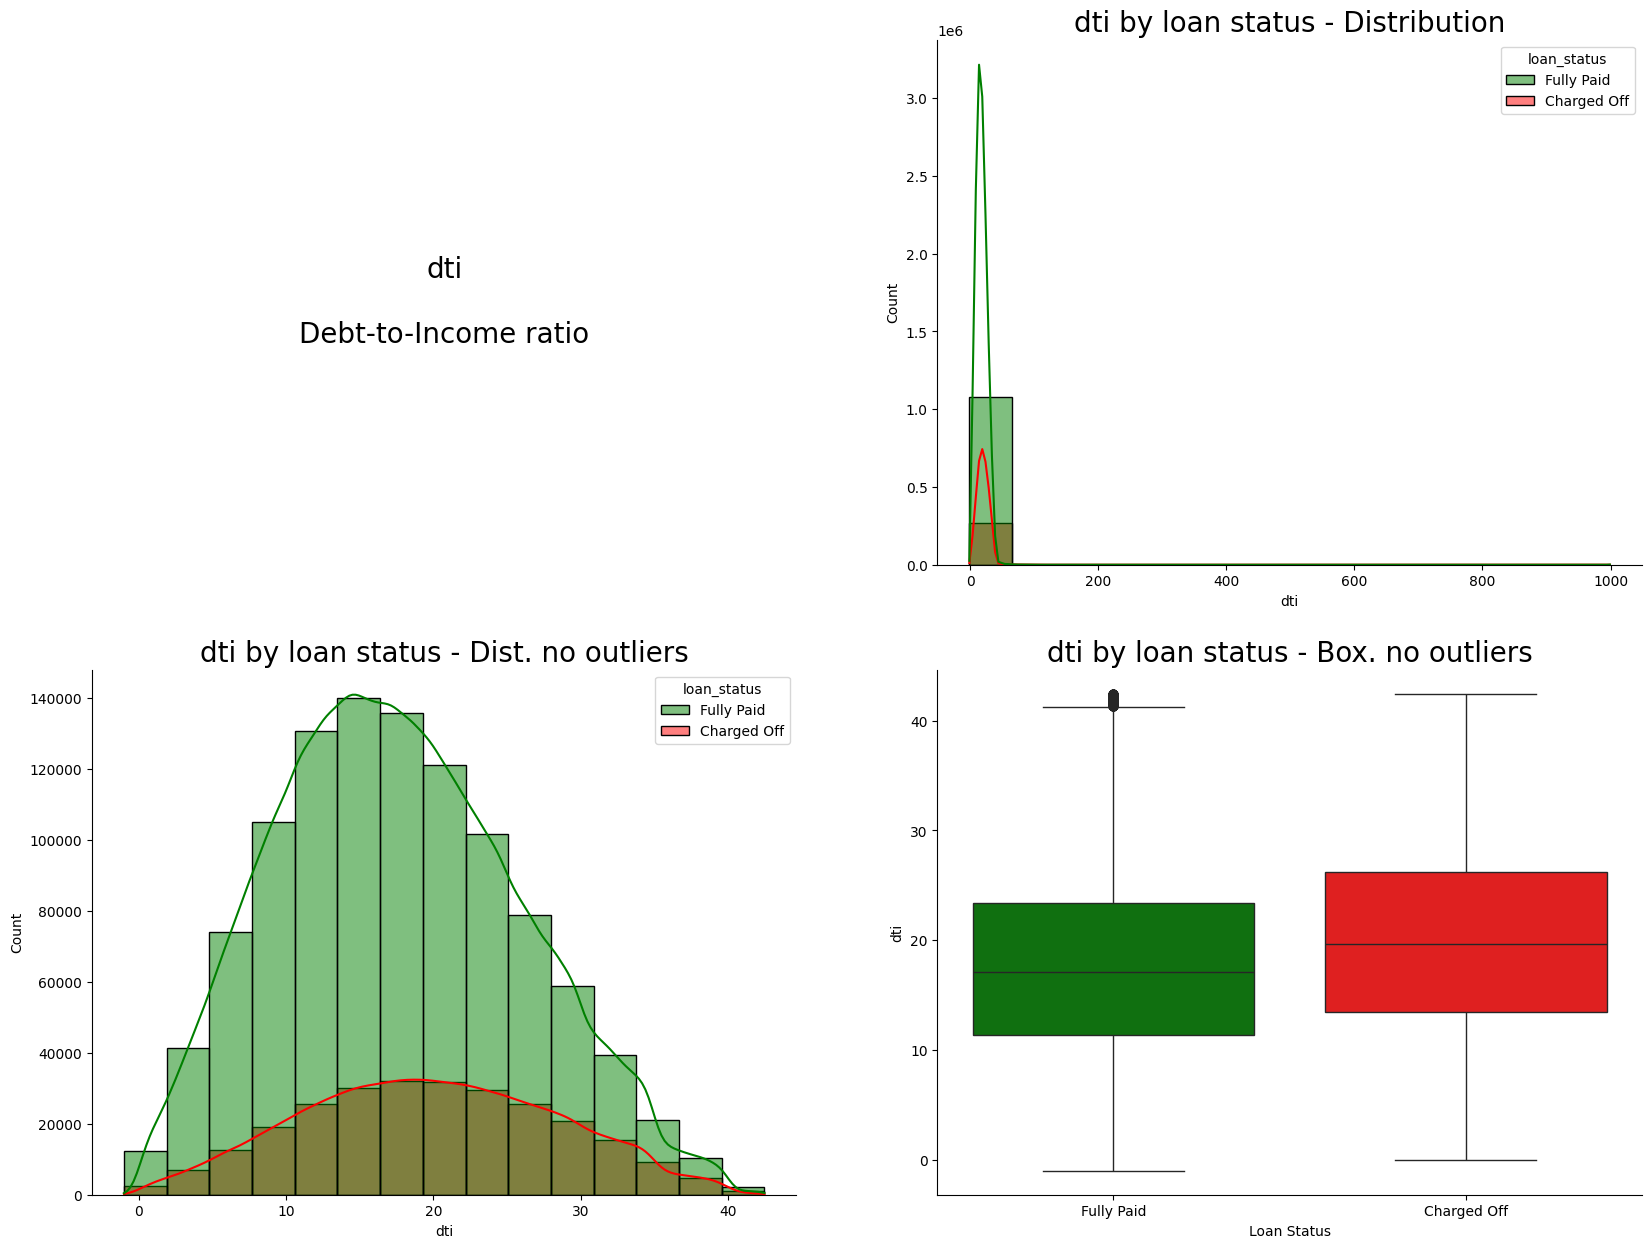

In [69]:
fig, ax =plt.subplots(2,2,figsize=(20,15))

sns.despine()

ax0 = fig.add_subplot(ax[0,0])
ax0.spines[:].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,'dti\n\nDebt-to-Income ratio',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=20,
         color='#000000')

ax[0,1].tick_params(axis='x', labelrotation=0)
ax[0,1].set(xlabel='dti', ylabel='')
ax[0,1].set_title('dti by loan status - Distribution', size=20)
ax[1,0].tick_params(axis='x', labelrotation=0)
ax[1,0].set(xlabel='dti', ylabel='')
ax[1,0].set_title('dti by loan status - Dist. no outliers', size=20)
ax[1,1].set_title('dti by loan status - Box. no outliers', size=20)

sns.histplot(data=df_final,x='dti',hue='loan_status',bins=15,
             kde=True,ax=ax[0,1], palette = {'Fully Paid' : 'green', 'Charged Off' : 'red'})

# Temporaly removing outliers to get a better visualization
dti=remove_outlier(df_final, 'dti')

sns.histplot(data=dti,x='dti',hue='loan_status',bins=15,
             kde=True, ax=ax[1,0], palette = {'Fully Paid' : 'green', 'Charged Off' : 'red'})

sns.boxplot(data=dti,x='loan_status',y='dti',ax=ax[1,1], palette = {'Fully Paid' : 'green', 'Charged Off' : 'red'}).set(xlabel='Loan Status',
                                                                                                                               ylabel='dti')

This feature is right-skewed and contains a large numbers of outliers. For better visualization, we remove these outliers, resulting in an approximately normal distribution. Based on our choice of machine learning model, we might consider removing these or performing log transformation to normalize the data.

`fico_range_low`

In [70]:
df_final['fico_range_low'].describe()

count    1.345310e+06
mean     6.961850e+02
std      3.185251e+01
min      6.250000e+02
25%      6.700000e+02
50%      6.900000e+02
75%      7.100000e+02
max      8.450000e+02
Name: fico_range_low, dtype: float64

[Text(0.5, 0, 'Loan Status'), Text(0, 0.5, 'FICO range low')]

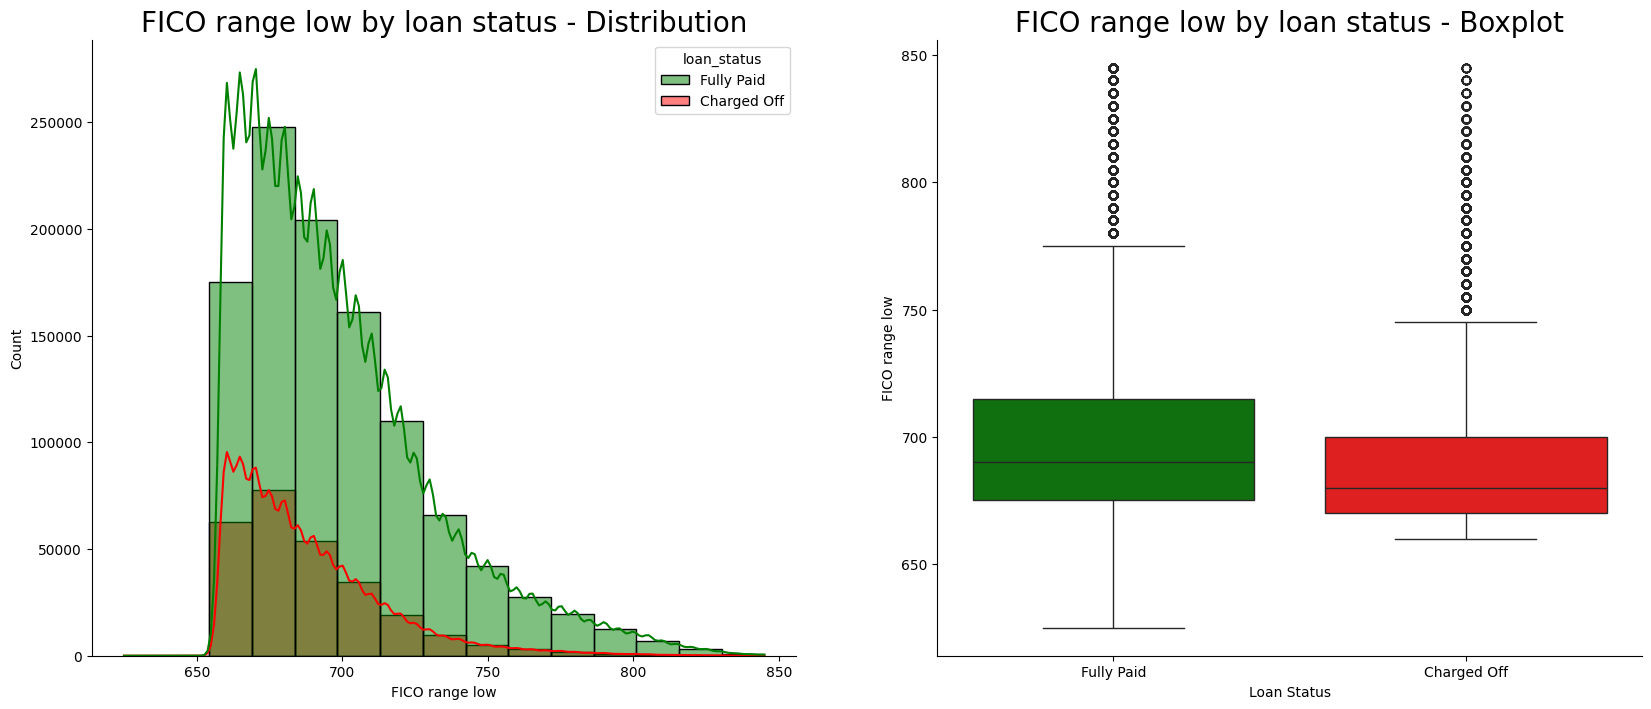

In [71]:
# FICO range low count by loan status

fig, ax =plt.subplots(1,2,figsize=(20,8))

sns.despine()

ax[0].tick_params(axis='x', labelrotation=0)
ax[0].set(xlabel='FICO range low', ylabel='')
ax[0].set_title('FICO range low by loan status - Distribution', size=20)
ax[1].tick_params(axis='x', labelrotation=0)
ax[1].set_title('FICO range low by loan status - Boxplot', size=20)


sns.histplot(data=df_final,x='fico_range_low',hue='loan_status',bins=15,
             kde=True,ax=ax[0], palette = {'Fully Paid': 'green', 'Charged Off': 'red'})

sns.boxplot(data=df_final,x='loan_status',y='fico_range_low',ax=ax[1], palette = {'Fully Paid': 'green', 'Charged Off': 'red'}).set(xlabel='Loan Status',
                                                                                                                              ylabel='FICO range low')

`fico_range_high`

In [72]:
df_final['fico_range_high'].describe()

count    1.345310e+06
mean     7.001852e+02
std      3.185316e+01
min      6.290000e+02
25%      6.740000e+02
50%      6.940000e+02
75%      7.140000e+02
max      8.500000e+02
Name: fico_range_high, dtype: float64

[Text(0.5, 0, 'Loan Status'), Text(0, 0.5, 'FICO range high')]

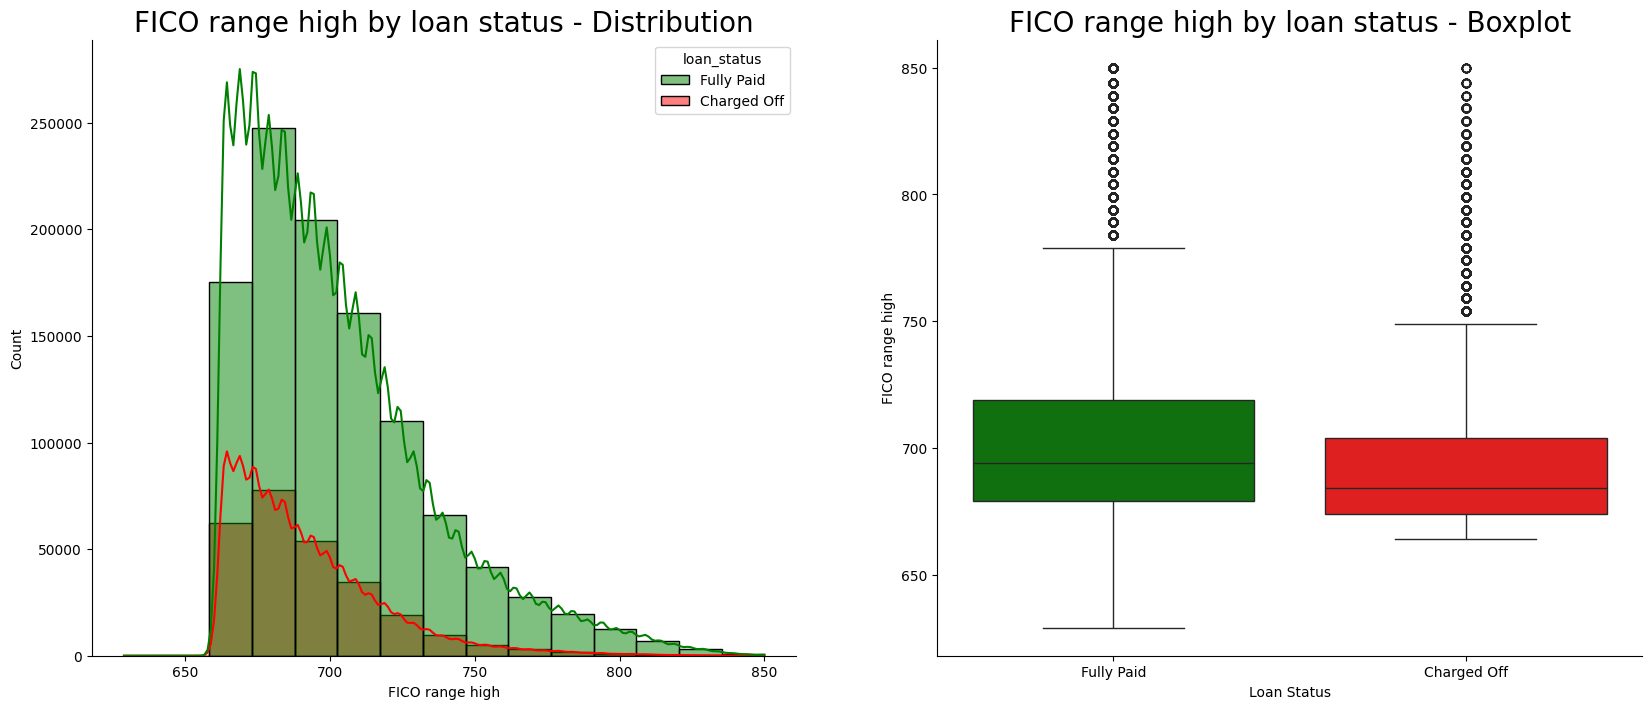

In [73]:
# FICO range high count by loan status

fig, ax =plt.subplots(1,2,figsize=(20,8))

sns.despine()

ax[0].tick_params(axis='x', labelrotation=0)
ax[0].set(xlabel='FICO range high', ylabel='')
ax[0].set_title('FICO range high by loan status - Distribution', size=20)
ax[1].tick_params(axis='x', labelrotation=0)
ax[1].set_title('FICO range high by loan status - Boxplot', size=20)


sns.histplot(data=df_final,x='fico_range_high',hue='loan_status',bins=15,
             kde=True,ax=ax[0], palette = {'Fully Paid': 'green', 'Charged Off': 'red'})

sns.boxplot(data=df_final,x='loan_status',y='fico_range_high',ax=ax[1], palette = {'Fully Paid': 'green', 'Charged Off': 'red'}).set(xlabel='Loan Status',
                                                                                                                              ylabel='FICO range high')

`fico_range_high` and `fico_range_low` has pretty similar distribution. This is expected since FICO scores typically follow a range. Consider taking the average of these two features since it won't change their distribution all that much.

`open_acc`

In [74]:
df_final['open_acc'].describe()

count    1.345310e+06
mean     1.159352e+01
std      5.473789e+00
min      0.000000e+00
25%      8.000000e+00
50%      1.100000e+01
75%      1.400000e+01
max      9.000000e+01
Name: open_acc, dtype: float64

[Text(0.5, 0, 'Loan Status'), Text(0, 0.5, '# of open accounts')]

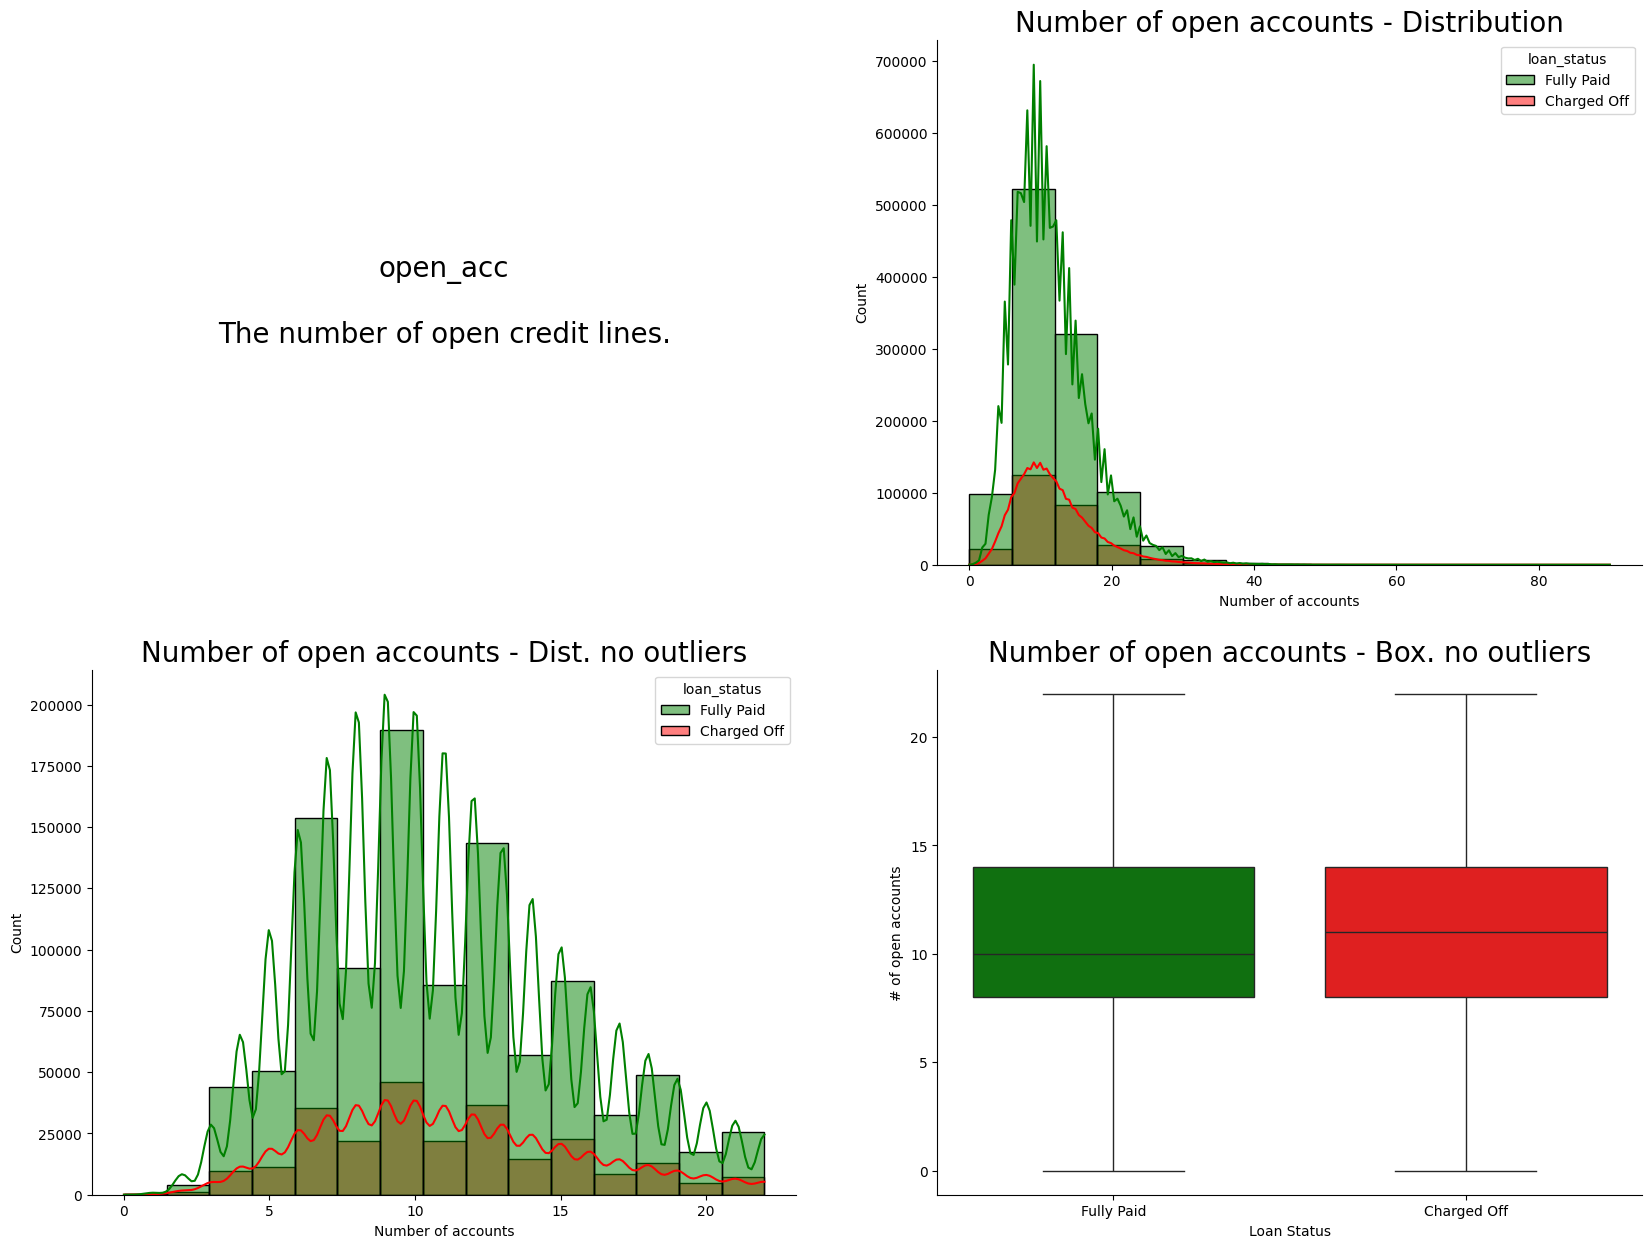

In [75]:
fig, ax =plt.subplots(2,2,figsize=(20,15))

sns.despine()

ax0 = fig.add_subplot(ax[0,0])
ax0.spines[:].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,'open_acc\n\nThe number of open credit lines.',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=20,
         color='#000000')

ax[0,1].tick_params(axis='x', labelrotation=0)
ax[0,1].set(xlabel='Number of accounts', ylabel='')
ax[0,1].set_title('Number of open accounts - Distribution', size=20)
ax[1,0].tick_params(axis='x', labelrotation=0)
ax[1,0].set(xlabel='Number of accounts', ylabel='')
ax[1,0].set_title('Number of open accounts - Dist. no outliers', size=20)
ax[1,1].set_title('Number of open accounts - Box. no outliers', size=20)

sns.histplot(data=df_final,x='open_acc',hue='loan_status',bins=15,
             kde=True,ax=ax[0,1], palette={'Fully Paid' : 'green', 'Charged Off' : 'red'})

# Temporaly removing outliers to get a better visualization
open_acc=remove_outlier(df_final, 'open_acc')

sns.histplot(data=open_acc,x='open_acc',hue='loan_status',bins=15,
             kde=True,ax=ax[1,0], palette={'Fully Paid' : 'green', 'Charged Off' : 'red'})
sns.boxplot(data=open_acc,x='loan_status',y='open_acc',ax=ax[1,1], palette={'Fully Paid' : 'green', 'Charged Off' : 'red'}).set(xlabel='Loan Status',
                                                                                                                                ylabel='# of open accounts')

The feature is right-skewed with many outliers. After removing these outliers for better visualization, the distribution looks more normal.

`pub_rec`

[Text(0.5, 0, 'Loan Status'), Text(0, 0.5, 'Number of public records')]

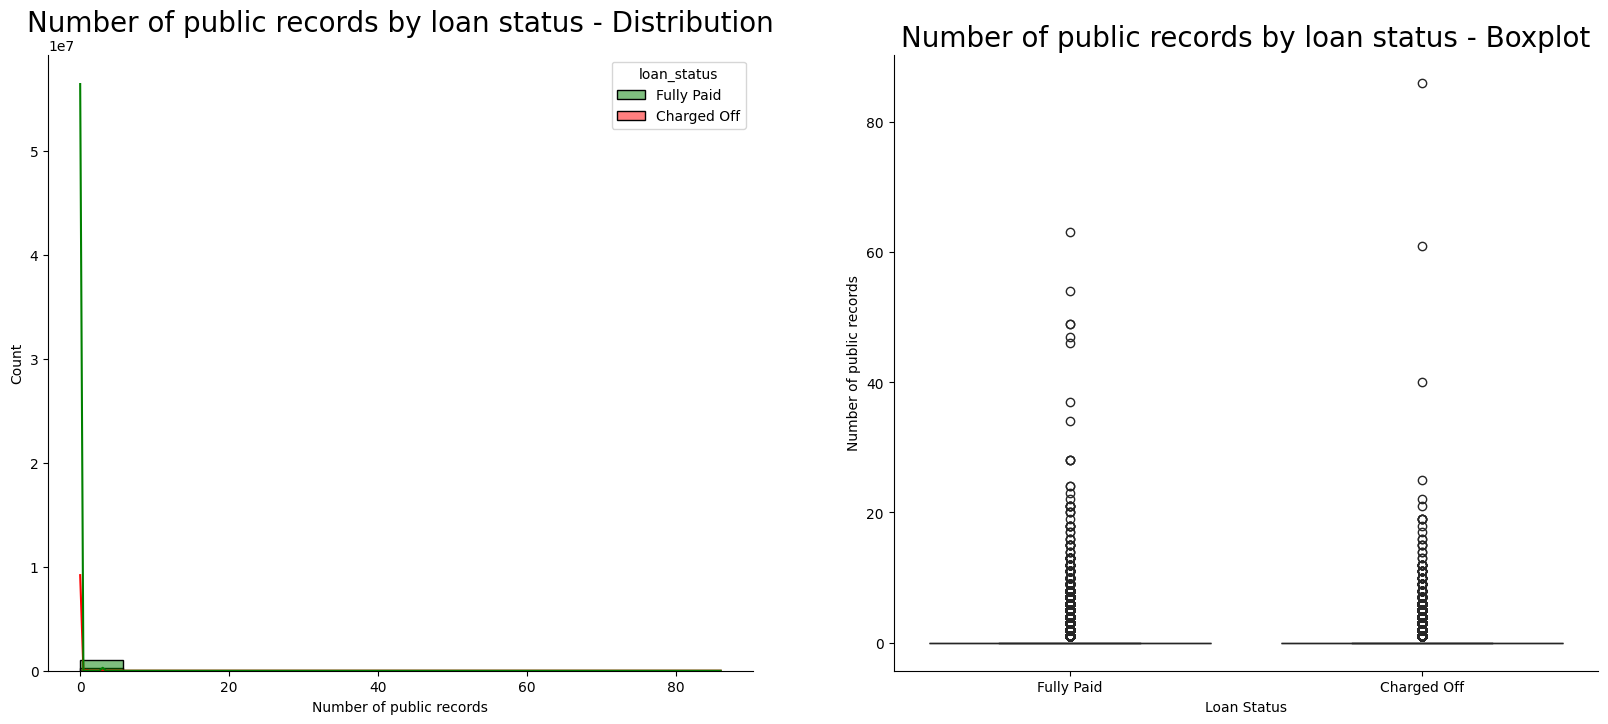

In [76]:
fig, ax =plt.subplots(1,2,figsize=(20,8))

sns.despine()

ax[0].tick_params(axis='x', labelrotation=0)
ax[0].set(xlabel='Number of public records', ylabel='')
ax[0].set_title('Number of public records by loan status - Distribution', size=20)
ax[1].tick_params(axis='x', labelrotation=0)
ax[1].set_title('Number of public records by loan status - Boxplot', size=20)


sns.histplot(data=df_final,x='pub_rec',hue='loan_status',bins=15,
             kde=True,ax=ax[0], palette = {'Fully Paid': 'green', 'Charged Off': 'red'})
sns.boxplot(data=df_final,x='loan_status',y='pub_rec',ax=ax[1], palette = {'Fully Paid': 'green', 'Charged Off': 'red'}).set(xlabel='Loan Status',
                                                                                                                              ylabel='Number of public records')

Based on the histogram above, the majority of loan applicants have the number of public records ranging from 0 to 5. Therefore, any datapoints with number of public records over 5 will be the outliers, making the distribution heavily skew to the right. This is self explanatory because it is less likely for applicants with high number of public records to get accepted for a loan.

`revol_bal`

[Text(0.5, 0, 'Loan Status'), Text(0, 0.5, 'Total revolving credit balance')]

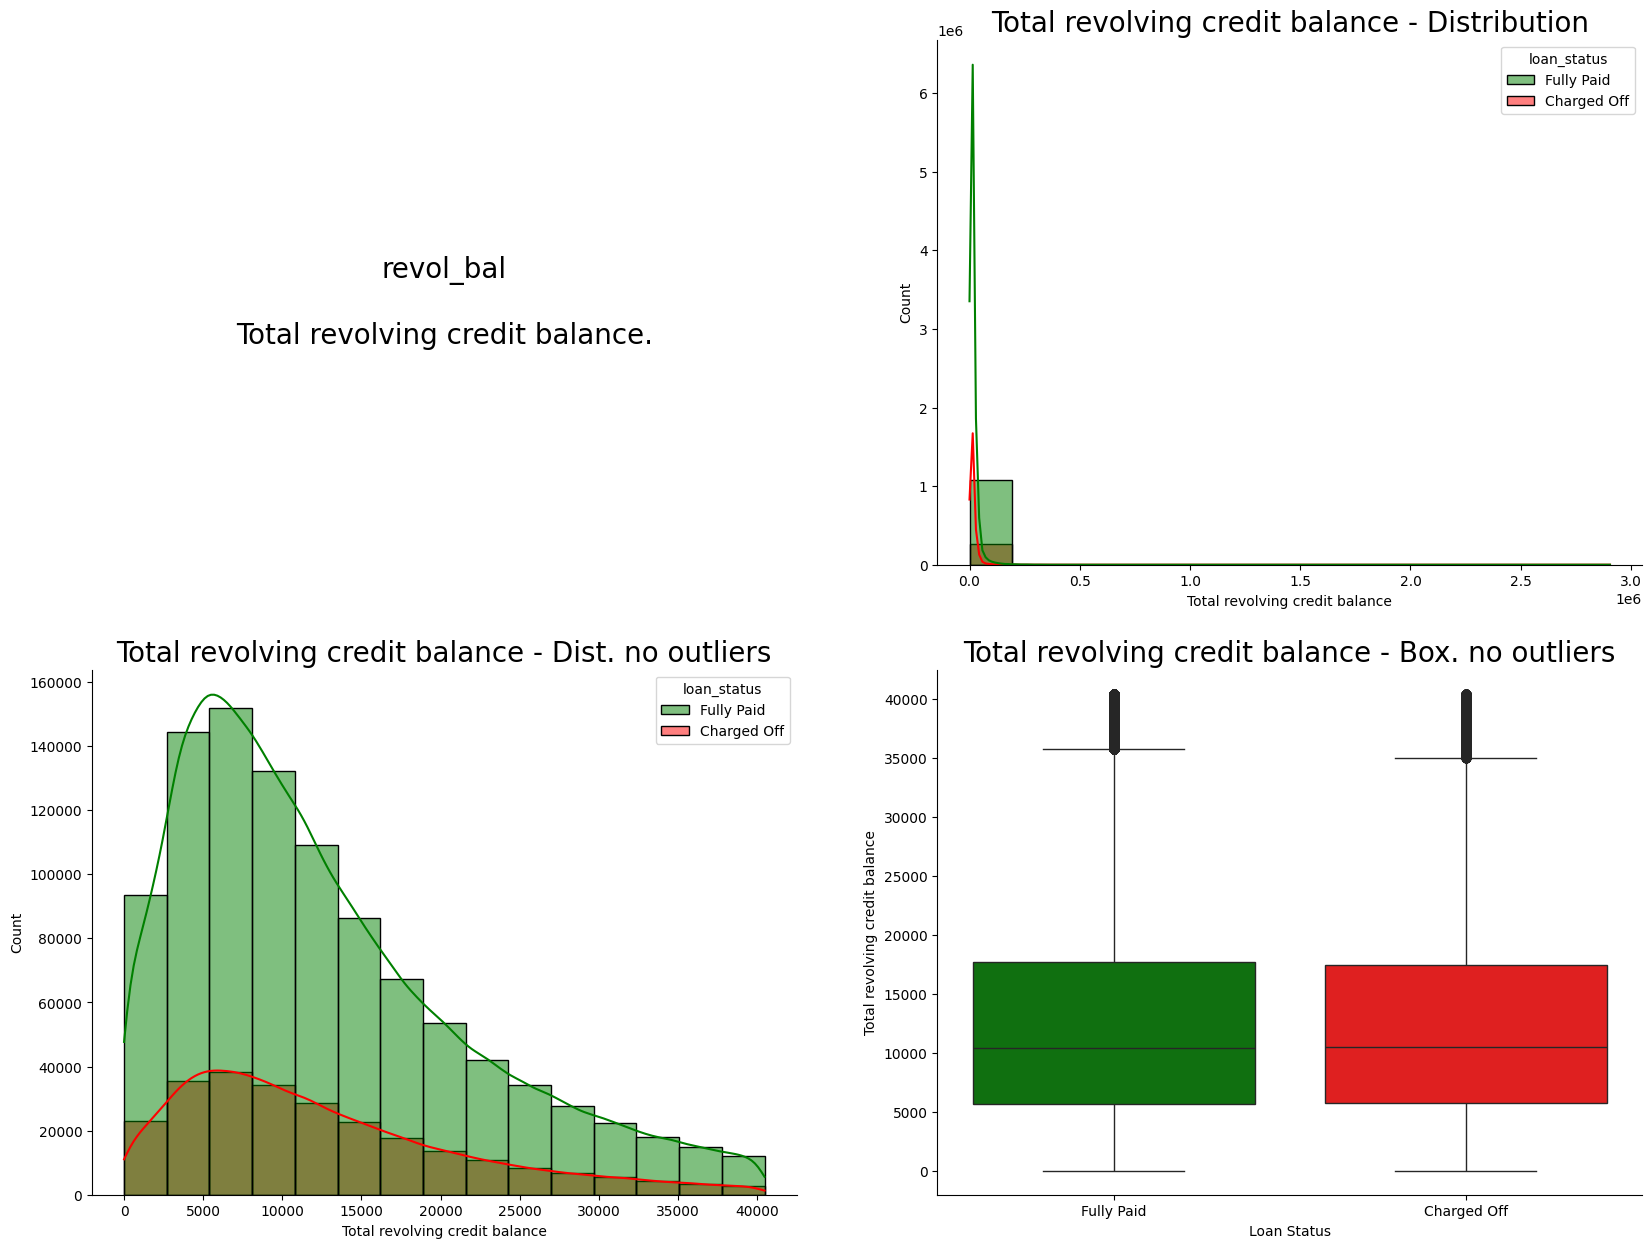

In [77]:
fig, ax =plt.subplots(2,2,figsize=(20,15))

sns.despine()

ax0 = fig.add_subplot(ax[0,0])
ax0.spines[:].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,'revol_bal\n\nTotal revolving credit balance.',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=20,
         color='#000000')

ax[0,1].tick_params(axis='x', labelrotation=0)
ax[0,1].set(xlabel='Total revolving credit balance', ylabel='')
ax[0,1].set_title('Total revolving credit balance - Distribution', size=20)
ax[1,0].tick_params(axis='x', labelrotation=0)
ax[1,0].set(xlabel='Total revolving credit balance', ylabel='')
ax[1,0].set_title('Total revolving credit balance - Dist. no outliers', size=20)
ax[1,1].set_title('Total revolving credit balance - Box. no outliers', size=20)

sns.histplot(data=df_final,x='revol_bal',hue='loan_status',bins=15,
             kde=True,ax=ax[0,1], palette={'Fully Paid' : 'green', 'Charged Off' : 'red'})

# Temporaly removing outliers to get a better visualization
revol_bal=remove_outlier(df_final, 'revol_bal')

sns.histplot(data=revol_bal,x='revol_bal',hue='loan_status',bins=15,
             kde=True,ax=ax[1,0], palette={'Fully Paid' : 'green', 'Charged Off' : 'red'})
sns.boxplot(data=revol_bal,x='loan_status',y='revol_bal',ax=ax[1,1], palette={'Fully Paid' : 'green', 'Charged Off' : 'red'}).set(xlabel='Loan Status',
                                                                                                                                ylabel='Total revolving credit balance')

As we can see from the first graph, there are many outliers in this feature. After removing the outliers, the distribution is right-skewed. 

`revol_util`

[Text(0.5, 0, 'Loan Status'), Text(0, 0.5, 'Total revolving utilization (%)')]

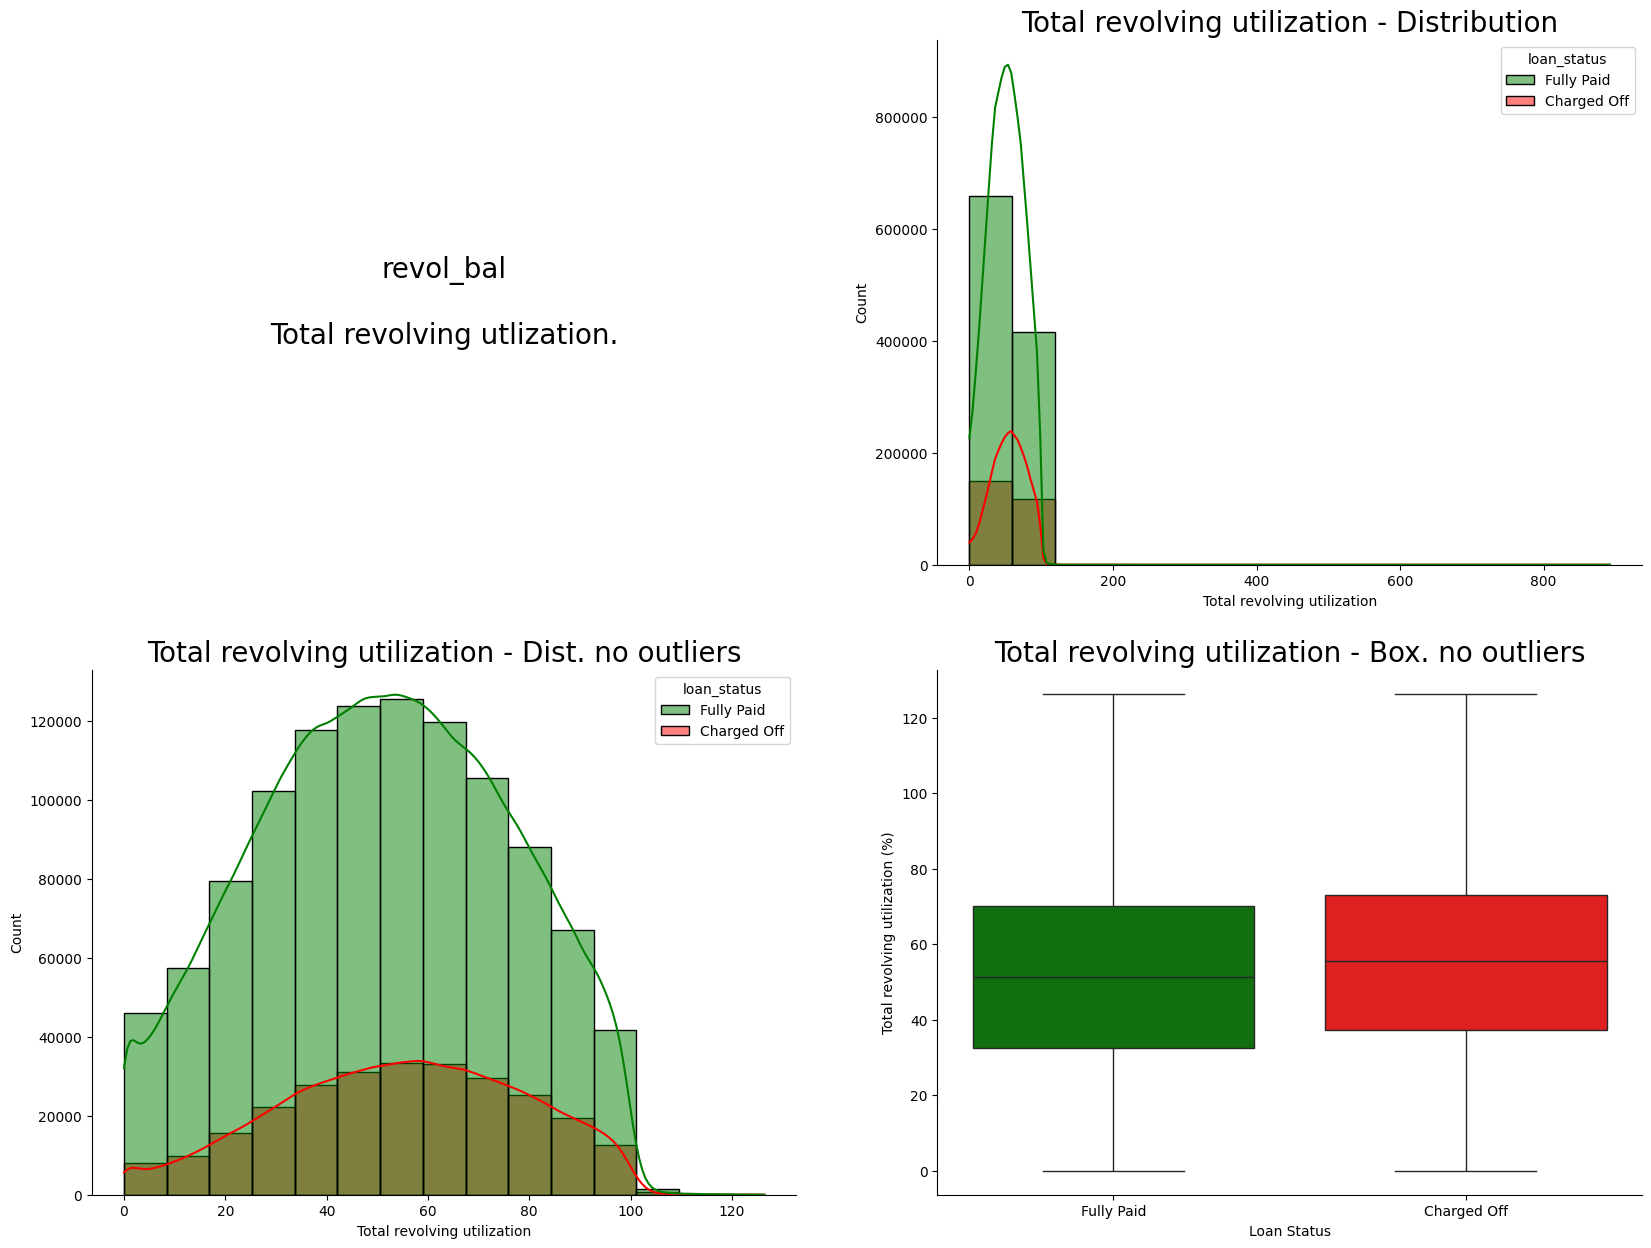

In [78]:
fig, ax =plt.subplots(2,2,figsize=(20,15))

sns.despine()

ax0 = fig.add_subplot(ax[0,0])
ax0.spines[:].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,'revol_bal\n\nTotal revolving utlization.',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=20,
         color='#000000')

ax[0,1].tick_params(axis='x', labelrotation=0)
ax[0,1].set(xlabel='Total revolving utilization', ylabel='')
ax[0,1].set_title('Total revolving utilization - Distribution', size=20)
ax[1,0].tick_params(axis='x', labelrotation=0)
ax[1,0].set(xlabel='Total revolving utilization', ylabel='')
ax[1,0].set_title('Total revolving utilization - Dist. no outliers', size=20)
ax[1,1].set_title('Total revolving utilization - Box. no outliers', size=20)

sns.histplot(data=df_final,x='revol_util',hue='loan_status',bins=15,
             kde=True,ax=ax[0,1], palette={'Fully Paid' : 'green', 'Charged Off' : 'red'})

# Temporaly removing outliers to get a better visualization
revol_util=remove_outlier(df_final, 'revol_util')

sns.histplot(data=revol_util,x='revol_util',hue='loan_status',bins=15,
             kde=True,ax=ax[1,0], palette={'Fully Paid' : 'green', 'Charged Off' : 'red'})
sns.boxplot(data=revol_util,x='loan_status',y='revol_util',ax=ax[1,1], palette={'Fully Paid' : 'green', 'Charged Off' : 'red'}).set(xlabel='Loan Status',
                                                                                                                                ylabel='Total revolving utilization (%)')

Based on the first graph, we see that there are many outliers in this feature. After removing outliers, the distribution is nearly normal.

`total_acc`

[Text(0.5, 0, 'Loan Status'),
 Text(0, 0.5, 'Number of total open credit accounts')]

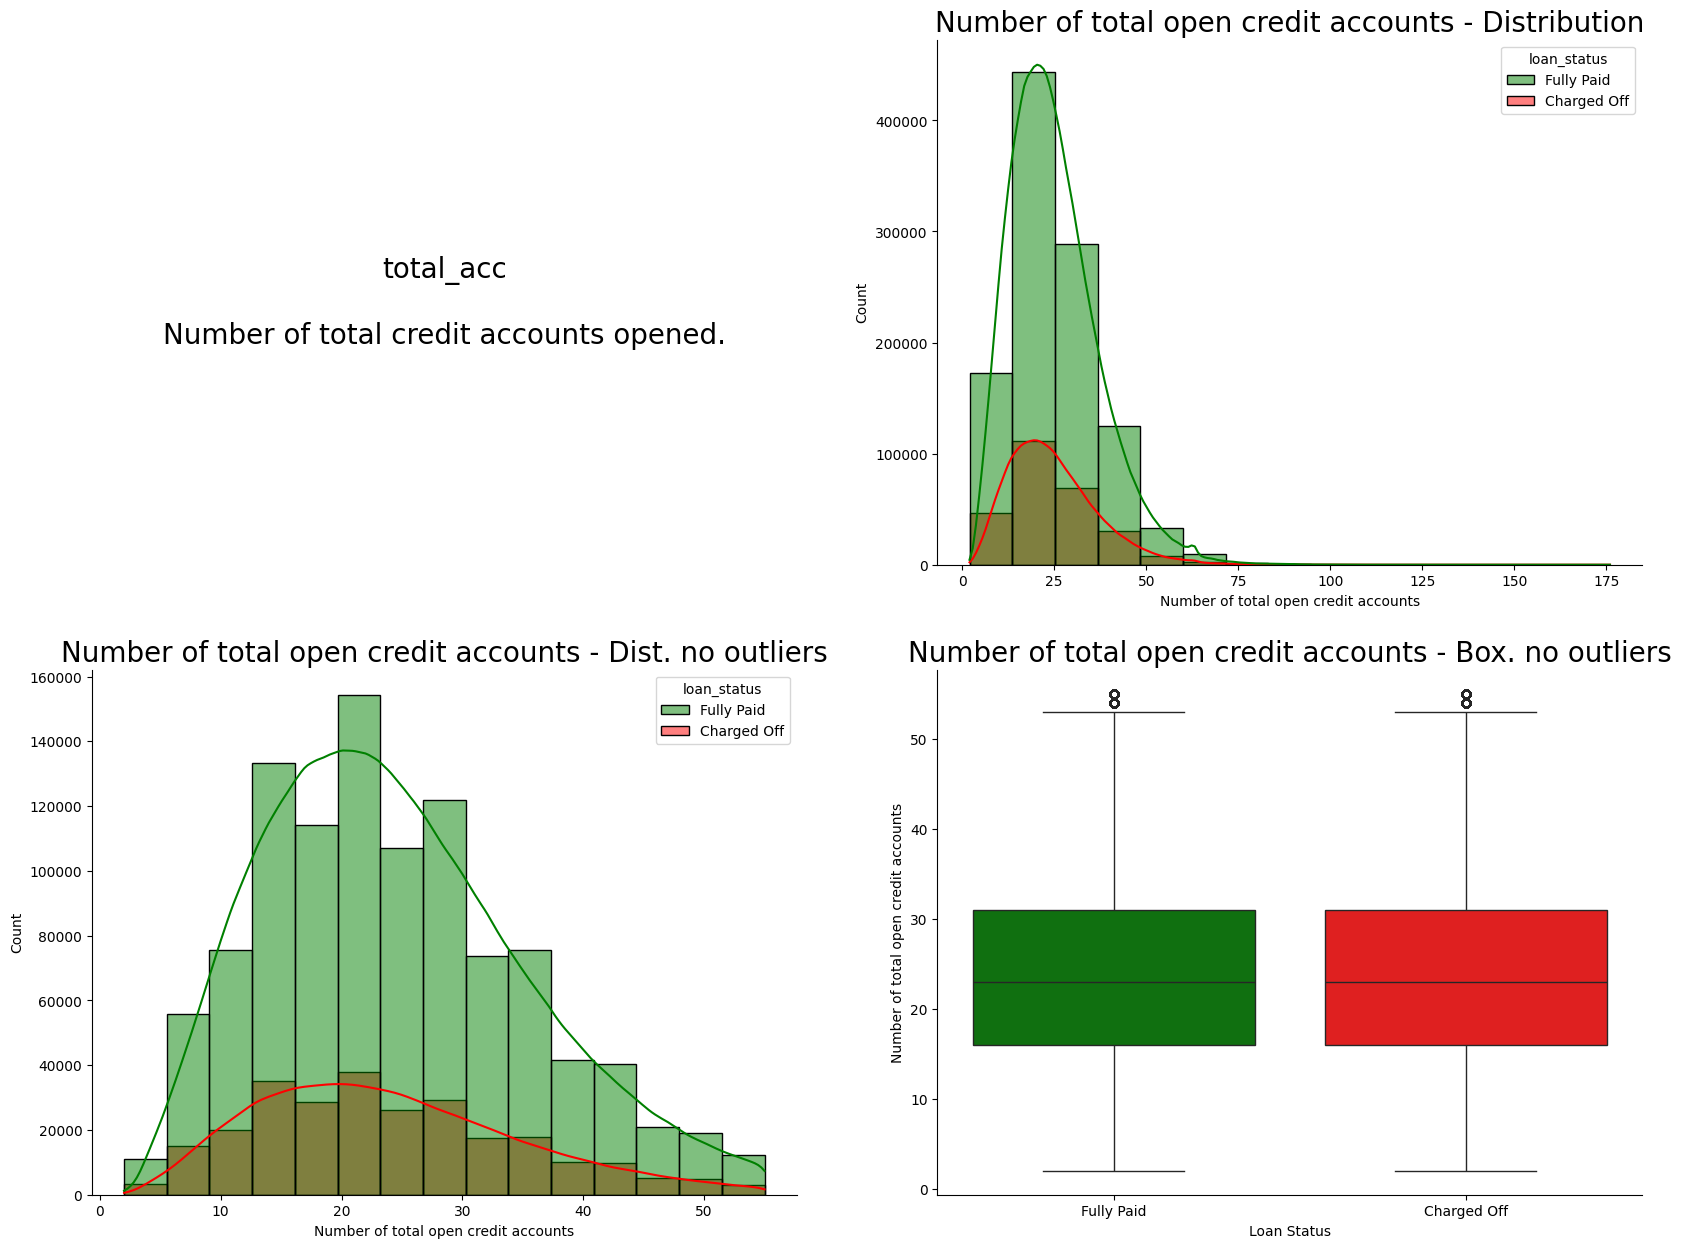

In [79]:
fig, ax =plt.subplots(2,2,figsize=(20,15))

sns.despine()

ax0 = fig.add_subplot(ax[0,0])
ax0.spines[:].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,'total_acc\n\nNumber of total credit accounts opened.',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=20,
         color='#000000')

ax[0,1].tick_params(axis='x', labelrotation=0)
ax[0,1].set(xlabel='Number of total open credit accounts', ylabel='')
ax[0,1].set_title('Number of total open credit accounts - Distribution', size=20)
ax[1,0].tick_params(axis='x', labelrotation=0)
ax[1,0].set(xlabel='Number of total open credit accounts', ylabel='')
ax[1,0].set_title('Number of total open credit accounts - Dist. no outliers', size=20)
ax[1,1].set_title('Number of total open credit accounts - Box. no outliers', size=20)

sns.histplot(data=df_final,x='total_acc',hue='loan_status',bins=15,
             kde=True,ax=ax[0,1], palette={'Fully Paid' : 'green', 'Charged Off' : 'red'})

# Temporaly removing outliers to get a better visualization
total_acc=remove_outlier(df_final, 'total_acc')

sns.histplot(data=total_acc,x='total_acc',hue='loan_status',bins=15,
             kde=True,ax=ax[1,0], palette={'Fully Paid' : 'green', 'Charged Off' : 'red'})
sns.boxplot(data=total_acc,x='loan_status',y='total_acc',ax=ax[1,1], palette={'Fully Paid' : 'green', 'Charged Off' : 'red'}).set(xlabel='Loan Status',
                                                                                                                                ylabel='Number of total open credit accounts')

After removing outliers, the distribution is pretty normal.

`policy_code`

In [80]:
df_final['policy_code'].describe()

count    1345310.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: policy_code, dtype: float64

In [81]:
df_final['policy_code'].unique()

array([1.])

Based on the information above, `policy_code` only have one unique value, which is 1. As it doesn't seem informative for classification purpose, we will remove this feature.

`mort_acc`

In [82]:
df_final['mort_acc'].describe()

count    1.298029e+06
mean     1.670783e+00
std      2.000444e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      5.100000e+01
Name: mort_acc, dtype: float64

[Text(0.5, 0, 'Loan Status'),
 Text(0, 0.5, 'Number of total open mortgage accounts')]

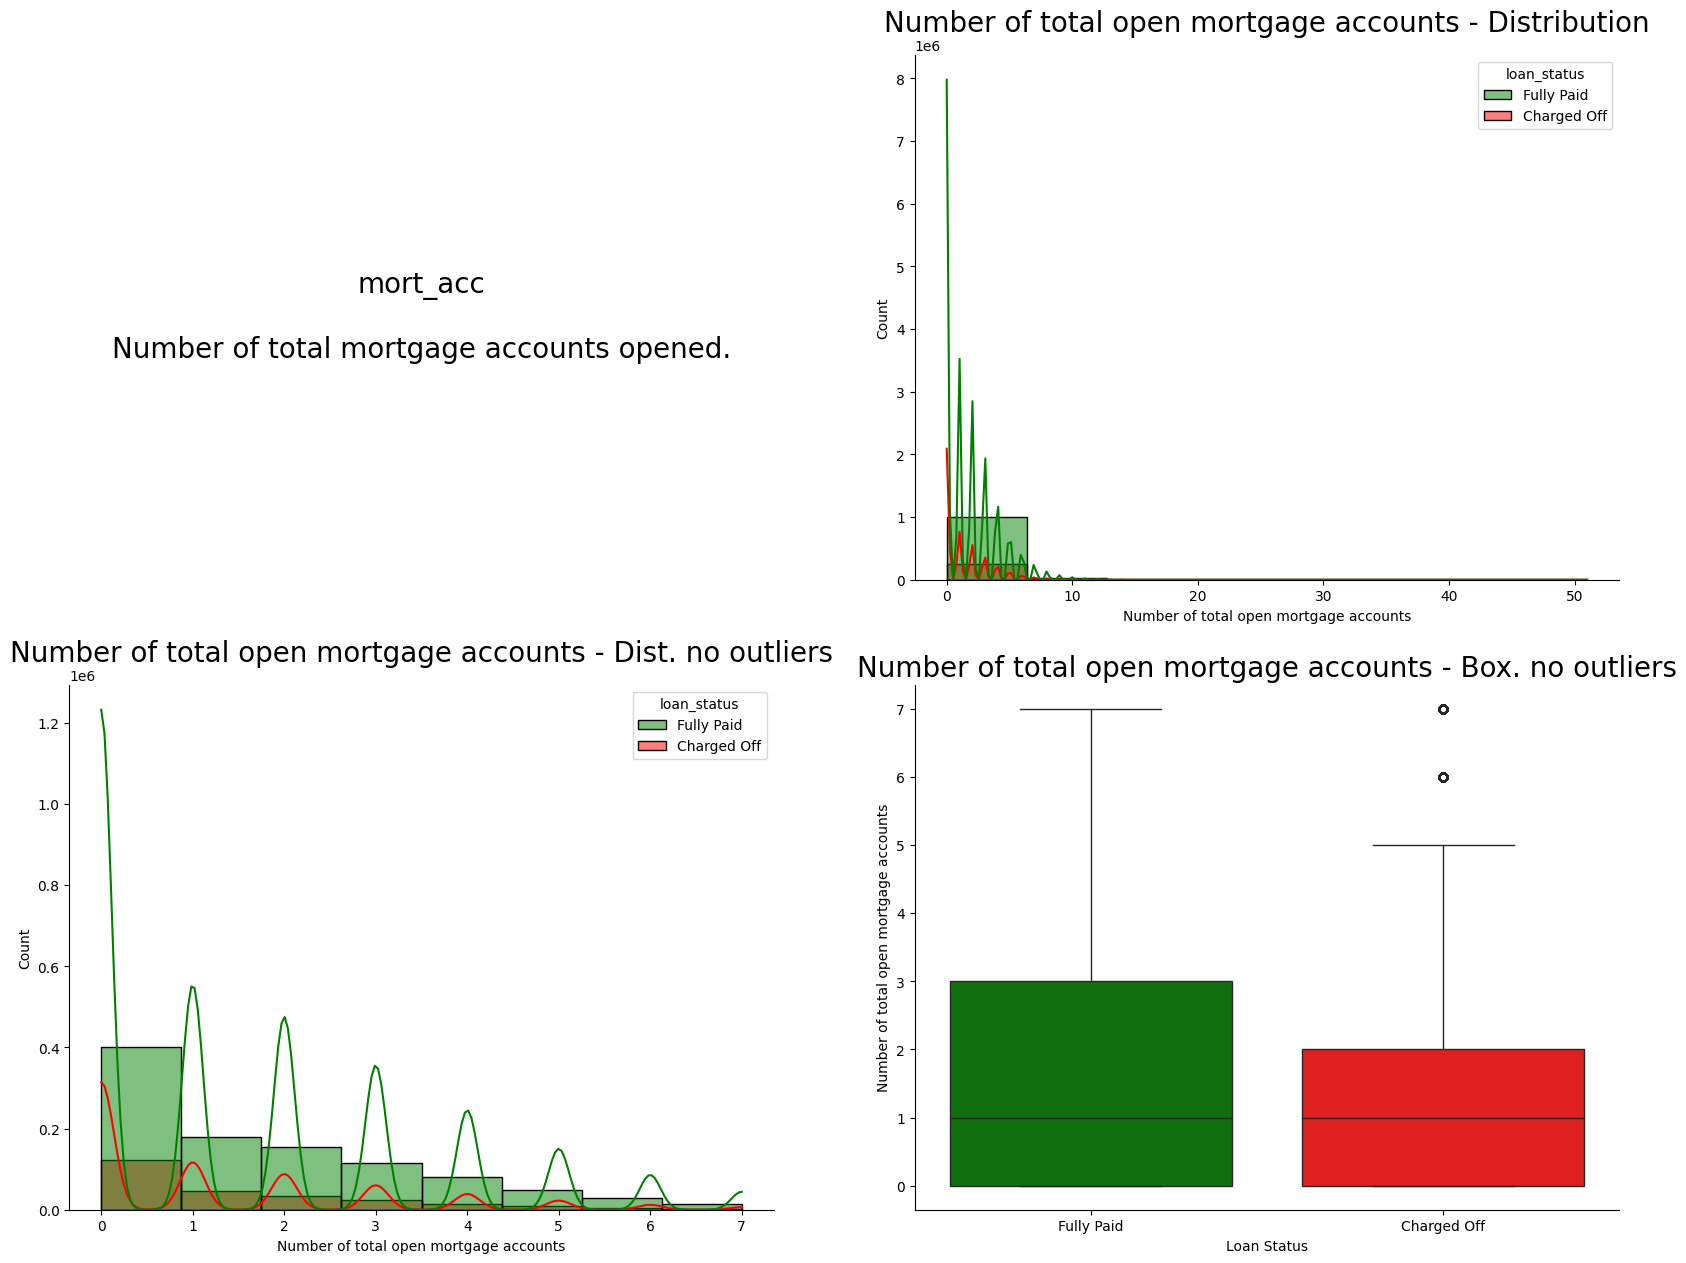

In [83]:
fig, ax =plt.subplots(2,2,figsize=(20,15))

sns.despine()

ax0 = fig.add_subplot(ax[0,0])
ax0.spines[:].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,'mort_acc\n\nNumber of total mortgage accounts opened.',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=20,
         color='#000000')

ax[0,1].tick_params(axis='x', labelrotation=0)
ax[0,1].set(xlabel='Number of total open mortgage accounts', ylabel='')
ax[0,1].set_title('Number of total open mortgage accounts - Distribution', size=20)
ax[1,0].tick_params(axis='x', labelrotation=0)
ax[1,0].set(xlabel='Number of total open mortgage accounts', ylabel='')
ax[1,0].set_title('Number of total open mortgage accounts - Dist. no outliers', size=20)
ax[1,1].set_title('Number of total open mortgage accounts - Box. no outliers', size=20)

sns.histplot(data=df_final,x='mort_acc',hue='loan_status',bins=8,
             kde=True,ax=ax[0,1], palette={'Fully Paid' : 'green', 'Charged Off' : 'red'})

# Temporaly removing outliers to get a better visualization
mort_acc=remove_outlier(df_final, 'mort_acc')

sns.histplot(data=mort_acc,x='mort_acc',hue='loan_status',bins=8,
             kde=True,ax=ax[1,0], palette={'Fully Paid' : 'green', 'Charged Off' : 'red'})
sns.boxplot(data=mort_acc,x='loan_status',y='mort_acc',ax=ax[1,1], palette={'Fully Paid' : 'green', 'Charged Off' : 'red'}).set(xlabel='Loan Status',
                                                                                                                                ylabel='Number of total open mortgage accounts')

Based on the graph above, we see that most applicants don't have mortgage accounts. Therefore, the distribution of this feature is right-skewed.

`pub_rec_bankruptcies`

In [84]:
df_final['pub_rec_bankruptcies'].describe()

count    1.344613e+06
mean     1.344439e-01
std      3.779285e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.200000e+01
Name: pub_rec_bankruptcies, dtype: float64

[Text(0.5, 0, 'Loan Status'),
 Text(0, 0.5, 'Number of public bankruptcy records')]

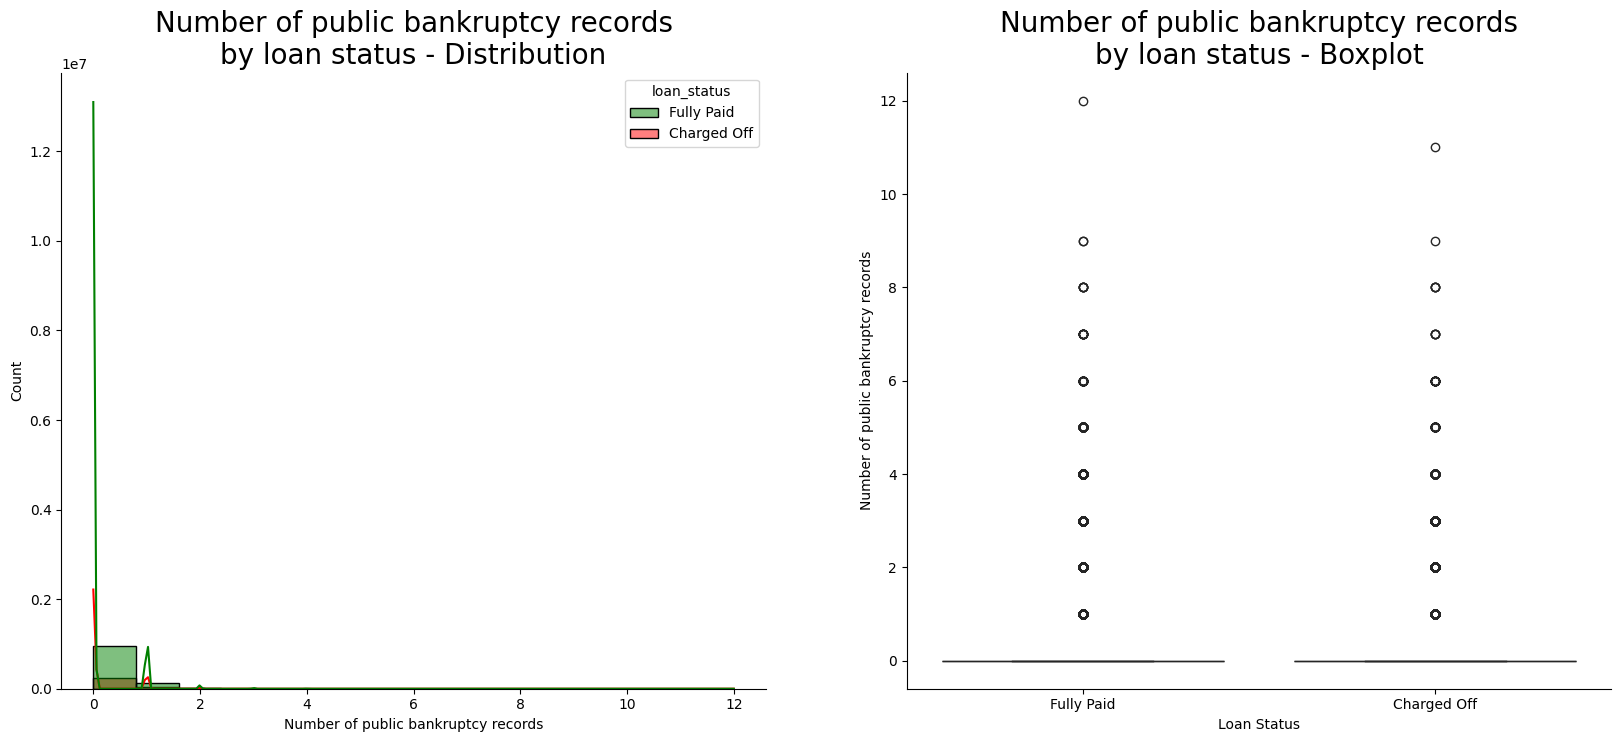

In [85]:
fig, ax =plt.subplots(1,2,figsize=(20,8))

sns.despine()

ax[0].tick_params(axis='x', labelrotation=0)
ax[0].set(xlabel='Number of public bankruptcy records', ylabel='')
ax[0].set_title('Number of public bankruptcy records\nby loan status - Distribution', size=20)
ax[1].tick_params(axis='x', labelrotation=0)
ax[1].set_title('Number of public bankruptcy records\nby loan status - Boxplot', size=20)


sns.histplot(data=df_final,x='pub_rec_bankruptcies',hue='loan_status',bins=15,
             kde=True,ax=ax[0], palette = {'Fully Paid': 'green', 'Charged Off': 'red'})
sns.boxplot(data=df_final,x='loan_status',y='pub_rec_bankruptcies',ax=ax[1], palette = {'Fully Paid': 'green', 'Charged Off': 'red'}).set(xlabel='Loan Status',
                                                                                                                              ylabel='Number of public bankruptcy records')

The distribution for this feature is heavily right-skewed. This is self explanatory because the higher the number of public bankruptcy records, the less likely the loan was approved.

`GDP_growth`

In [86]:
df_final['GDP_growth'].describe()

count    1.345310e+06
mean     9.123103e-03
std      4.755318e-03
min     -1.951742e-02
25%      6.057606e-03
50%      9.669724e-03
75%      1.243501e-02
max      1.865187e-02
Name: GDP_growth, dtype: float64

[Text(0.5, 0, 'Loan Status'), Text(0, 0.5, 'GDP growth')]

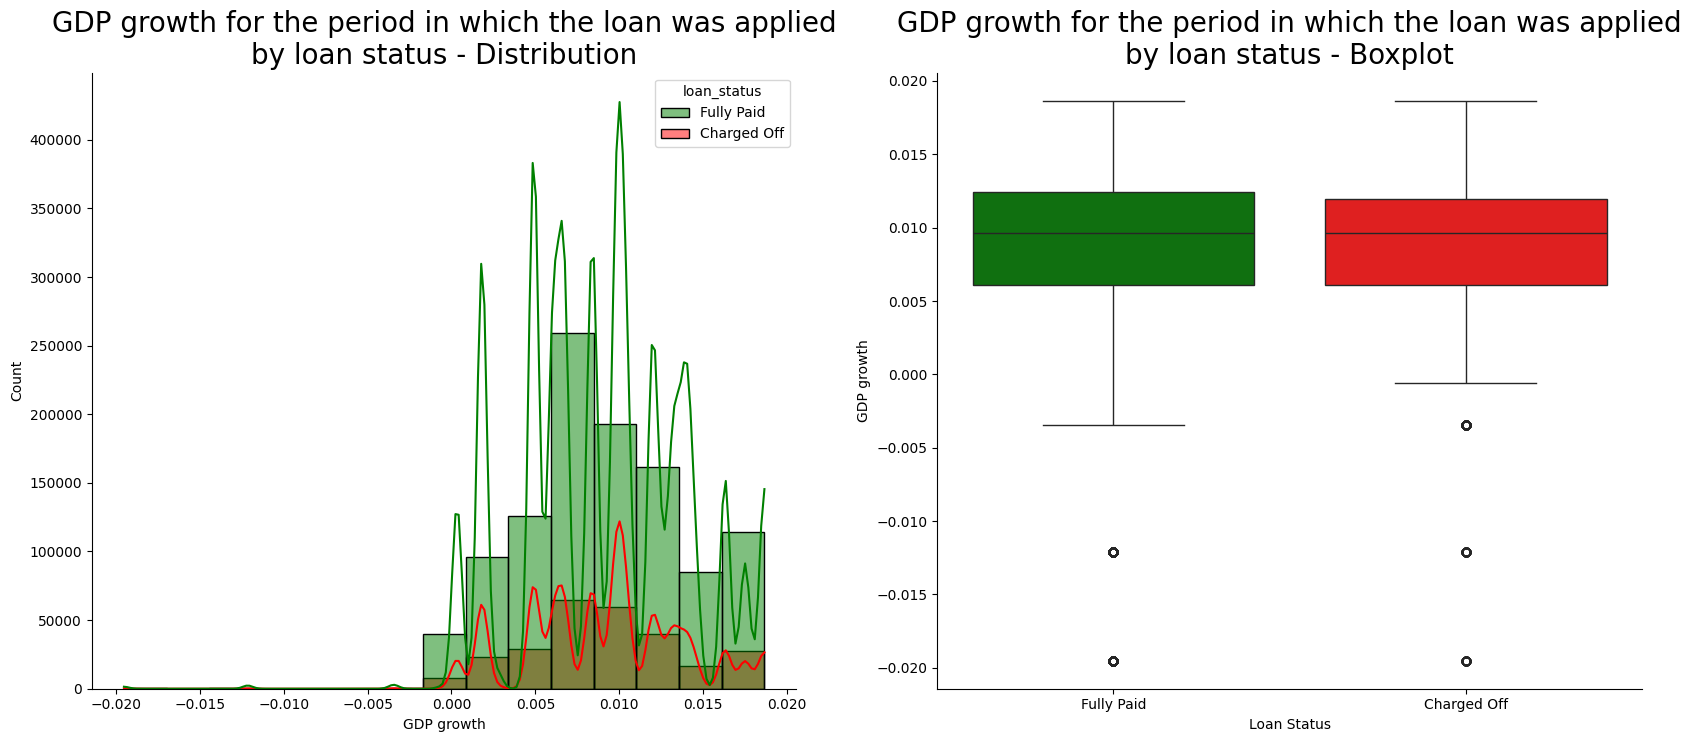

In [87]:
fig, ax =plt.subplots(1,2,figsize=(20,8))

sns.despine()

ax[0].tick_params(axis='x', labelrotation=0)
ax[0].set(xlabel='GDP growth', ylabel='')
ax[0].set_title('GDP growth for the period in which the loan was applied\nby loan status - Distribution', size=20)
ax[1].tick_params(axis='x', labelrotation=0)
ax[1].set_title('GDP growth for the period in which the loan was applied\nby loan status - Boxplot', size=20)


sns.histplot(data=df_final,x='GDP_growth',hue='loan_status',bins=15,
             kde=True,ax=ax[0], palette = {'Fully Paid': 'green', 'Charged Off': 'red'})
sns.boxplot(data=df_final,x='loan_status',y='GDP_growth',ax=ax[1], palette = {'Fully Paid': 'green', 'Charged Off': 'red'}).set(xlabel='Loan Status',
                                                                                                                              ylabel='GDP growth')

Based on the graph, it seems that the higher the GDP growth, the lower number of loan charged off relatively, which is self explanatory because this is an indication of bloom market.

`inflation_rate`

In [88]:
df_final['inflation_rate'].describe()

count    1.345310e+06
mean     1.244941e+00
std      8.036608e-01
min     -3.555463e-01
25%      1.186271e-01
50%      1.261583e+00
75%      1.622223e+00
max      3.839100e+00
Name: inflation_rate, dtype: float64

[Text(0.5, 0, 'Loan Status'), Text(0, 0.5, 'Inflation rate')]

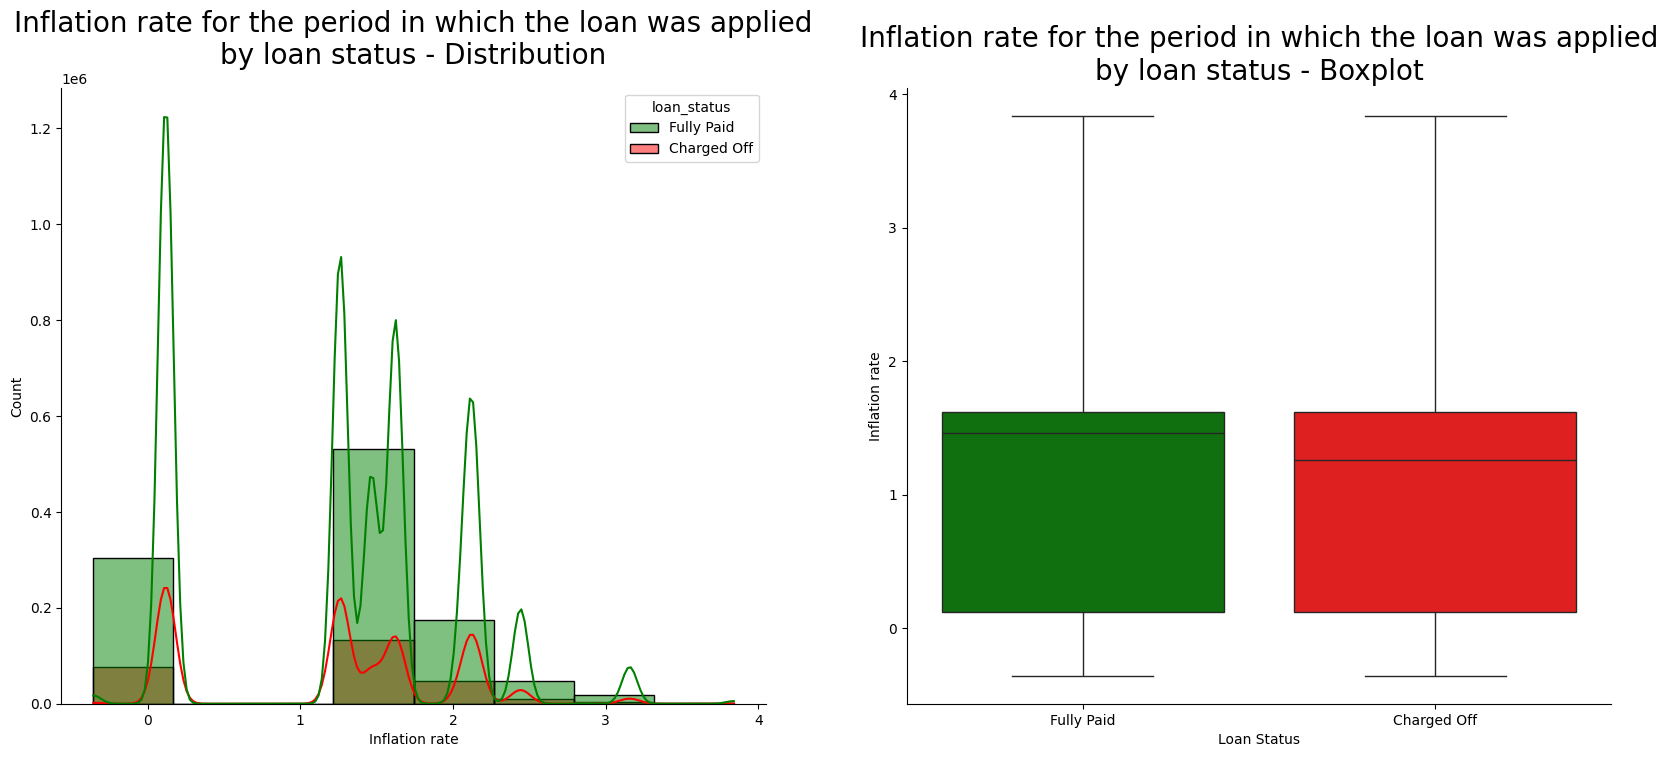

In [89]:
fig, ax =plt.subplots(1,2,figsize=(20,8))

sns.despine()

ax[0].tick_params(axis='x', labelrotation=0)
ax[0].set(xlabel='Inflation rate', ylabel='')
ax[0].set_title('Inflation rate for the period in which the loan was applied\nby loan status - Distribution', size=20)
ax[1].tick_params(axis='x', labelrotation=0)
ax[1].set_title('Inflation rate for the period in which the loan was applied\nby loan status - Boxplot', size=20)


sns.histplot(data=df_final,x='inflation_rate',hue='loan_status',bins=8,
             kde=True,ax=ax[0], palette = {'Fully Paid': 'green', 'Charged Off': 'red'})
sns.boxplot(data=df_final,x='loan_status',y='inflation_rate',ax=ax[1], palette = {'Fully Paid': 'green', 'Charged Off': 'red'}).set(xlabel='Loan Status',
                                                                                                                              ylabel='Inflation rate')

Based on the graph above, the higher the inflation rate, the more likely a loan is charged off, which is self explanatory because this is an indication of bear market.

`unemp_rate`

In [90]:
df_final['unemp_rate'].describe()

count    1.345310e+06
mean     5.577396e+00
std      1.197080e+00
min      3.700000e+00
25%      4.900000e+00
50%      5.100000e+00
75%      6.200000e+00
max      1.000000e+01
Name: unemp_rate, dtype: float64

[Text(0.5, 0, 'Loan Status'), Text(0, 0.5, 'Unemployment rate')]

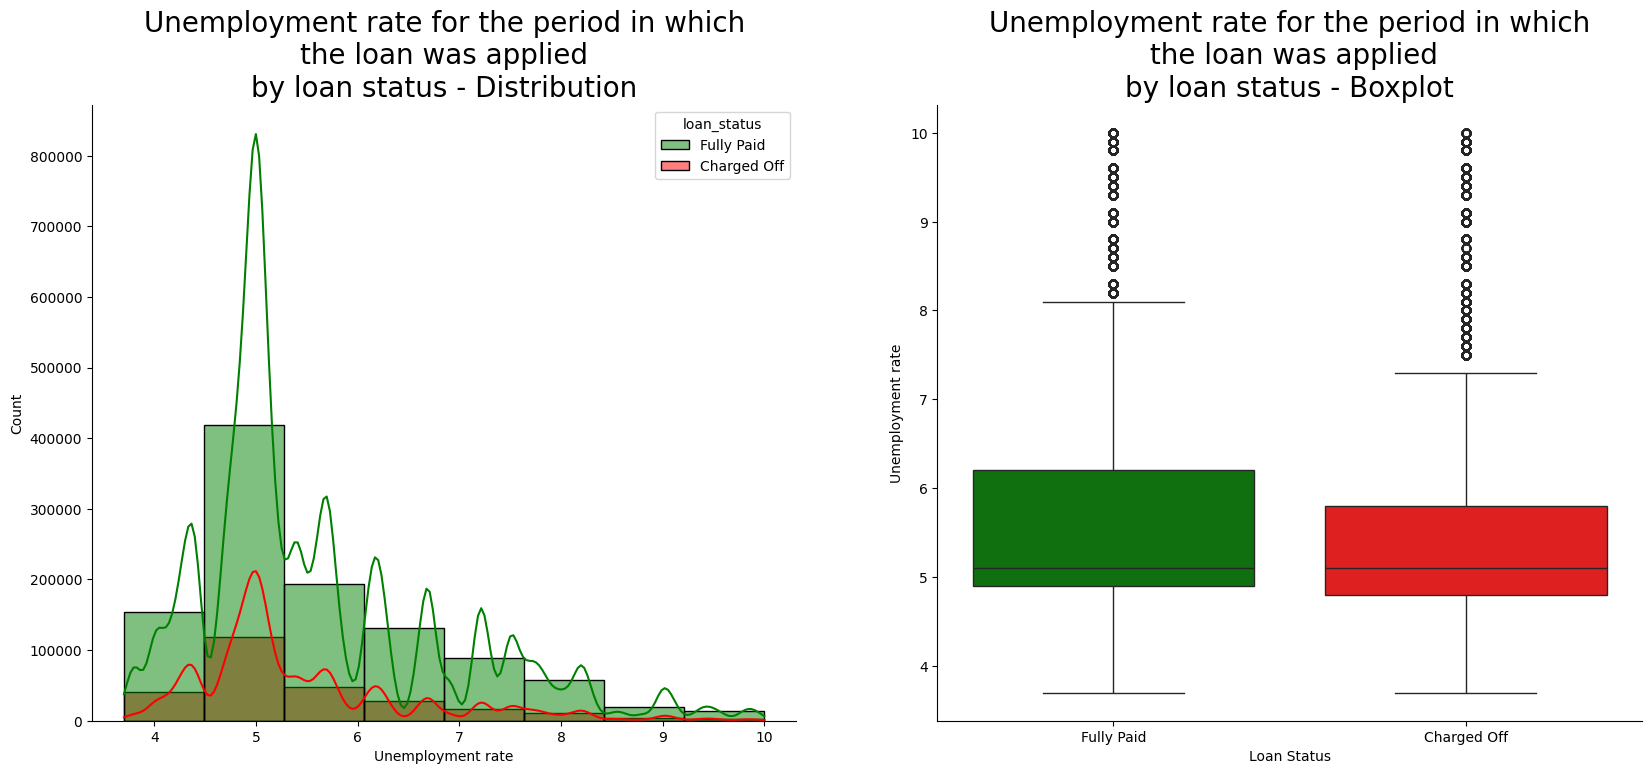

In [91]:
fig, ax =plt.subplots(1,2,figsize=(20,8))

sns.despine()

ax[0].tick_params(axis='x', labelrotation=0)
ax[0].set(xlabel='Unemployment rate', ylabel='')
ax[0].set_title('Unemployment rate for the period in which\nthe loan was applied\nby loan status - Distribution', size=20)
ax[1].tick_params(axis='x', labelrotation=0)
ax[1].set_title('Unemployment rate for the period in which\n the loan was applied\nby loan status - Boxplot', size=20)


sns.histplot(data=df_final,x='unemp_rate',hue='loan_status',bins=8,
             kde=True,ax=ax[0], palette = {'Fully Paid': 'green', 'Charged Off': 'red'})
sns.boxplot(data=df_final,x='loan_status',y='unemp_rate',ax=ax[1], palette = {'Fully Paid': 'green', 'Charged Off': 'red'}).set(xlabel='Loan Status',
                                                                                                                              ylabel='Unemployment rate')

In the US, unemployment rate below 5% is considered full employment in the US as even in the healthiest economy, unemployment can still be found. The graph above is self explanatory as we can see that when unemployment rate is at or below 5%, the number of loan applications increase, and when it is over 5%, the number of loan applications decrease. Additionally, it seems that the higher the unemployement rate, the higher the number of charged off loan as increasing unemployment rate indicates bear market.

We now create a heatmap to observe the correlation among these economic factors.

<Axes: >

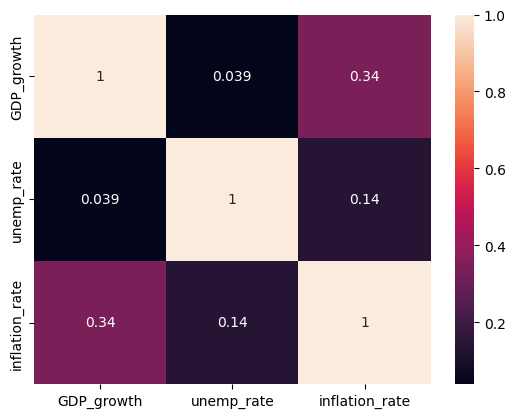

In [92]:
correlation = df_final[['GDP_growth', 'unemp_rate', 'inflation_rate']].corr()

sns.heatmap(correlation, annot=True)

Based on the heatmap, we find that `inflation_rate` and `GDP_growth` are positively corrlated, with a moderate corrlation of 0.34. While this graph doesn't explain causation, however, in real world, increasing GDP growth and increasing inflation rate happen together due to an increase in demand. 

It is interesting that `unemp_rate` has a slight positive relationship with `inflation_rate` and `GDP_growth`. Theoretically, in a bloom market in which inflation rate and GDP growth increase, unemployment rate should be decreasing.

# Feature engineering

Based on the EDA above, we now take the average of `fico_range_low` and `fico_range_high`.

In [93]:
df_final['avg_fico'] = (df_final['fico_range_low']+df_final['fico_range_high'])/2

In [94]:
df_final['avg_fico']

0          677.0
1          717.0
2          697.0
3          697.0
4          692.0
           ...  
1345305    737.0
1345306    707.0
1345307    737.0
1345308    667.0
1345309    662.0
Name: avg_fico, Length: 1345310, dtype: float64

In [95]:
#drop `fico_range_low` and `fico_range_high`

df_final = df_final.drop(columns = ['fico_range_low', 'fico_range_high'])

In [96]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345310 entries, 0 to 1345309
Data columns (total 29 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   loan_amnt             1345310 non-null  float64       
 1   term                  1345310 non-null  object        
 2   int_rate              1345310 non-null  float64       
 3   grade                 1345310 non-null  object        
 4   sub_grade             1345310 non-null  object        
 5   emp_title             1259525 non-null  object        
 6   emp_length            1266799 non-null  object        
 7   home_ownership        1345310 non-null  object        
 8   annual_inc            1345310 non-null  float64       
 9   verification_status   1345310 non-null  object        
 10  issue_d               1345310 non-null  datetime64[ns]
 11  loan_status           1345310 non-null  object        
 12  purpose               1345310 non-null  ob

We now calculate the length of credit history by taking the difference between `issue_d` and `earliest_cr_line`.

In [97]:
#convert `earliest_cr_line` to datetime format.
df_final['earliest_cr_line'] = pd.to_datetime(df_final['earliest_cr_line']) 

df_final['cr_history'] = df_final['issue_d'] - df_final['earliest_cr_line']

In [98]:
df_final['cr_history'] = df_final['cr_history'].dt.days

In [99]:
#convert `cr_history` from days to years.
df_final['cr_history'] = (df_final['cr_history'] / 365.25).astype('float64')

In [100]:
df_final['cr_history']

0          12.334018
1          16.000000
2          15.331964
3          17.500342
4          28.167009
             ...    
1345305    12.251882
1345306    14.587269
1345307     5.336071
1345308    19.167693
1345309    17.253936
Name: cr_history, Length: 1345310, dtype: float64

In [101]:
#drop `issue_d` and `earliest_cr_line`.
df_final = df_final.drop(columns=['issue_d','earliest_cr_line'])

In [102]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345310 entries, 0 to 1345309
Data columns (total 28 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   loan_amnt             1345310 non-null  float64
 1   term                  1345310 non-null  object 
 2   int_rate              1345310 non-null  float64
 3   grade                 1345310 non-null  object 
 4   sub_grade             1345310 non-null  object 
 5   emp_title             1259525 non-null  object 
 6   emp_length            1266799 non-null  object 
 7   home_ownership        1345310 non-null  object 
 8   annual_inc            1345310 non-null  float64
 9   verification_status   1345310 non-null  object 
 10  loan_status           1345310 non-null  object 
 11  purpose               1345310 non-null  object 
 12  zip_code              1345309 non-null  object 
 13  dti                   1344936 non-null  float64
 14  open_acc              1345310 non-

# Processing

### Dropping uninformative features

Based on the EDA, we now drop the columns that were determined to be not informative.

In [103]:
df_final = df_final.drop(columns=['emp_title', 'emp_length', 'zip_code', 'policy_code', 'grade'])

In [104]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345310 entries, 0 to 1345309
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   loan_amnt             1345310 non-null  float64
 1   term                  1345310 non-null  object 
 2   int_rate              1345310 non-null  float64
 3   sub_grade             1345310 non-null  object 
 4   home_ownership        1345310 non-null  object 
 5   annual_inc            1345310 non-null  float64
 6   verification_status   1345310 non-null  object 
 7   loan_status           1345310 non-null  object 
 8   purpose               1345310 non-null  object 
 9   dti                   1344936 non-null  float64
 10  open_acc              1345310 non-null  float64
 11  pub_rec               1345310 non-null  float64
 12  revol_bal             1345310 non-null  float64
 13  revol_util            1344453 non-null  float64
 14  total_acc             1345310 non-

### Handling missing values

In [105]:
#Inspect the missing values.
dict = {}
for i in list(df_final.columns):
    dict[i] = (df_final[i].isnull().sum(),round(df_final[i].isnull().sum()/len(df_final)*100,2))

pd.DataFrame(dict,index=["# of missing values","% of missing values"]).transpose().sort_values(by=["# of missing values"], ascending=False)

,# of missing values,% of missing values
mort_acc,47281.0,3.51
revol_util,857.0,0.06
pub_rec_bankruptcies,697.0,0.05
dti,374.0,0.03
loan_amnt,0.0,0.00
revol_bal,0.0,0.00
avg_fico,0.0,0.00
unemp_rate,0.0,0.00
inflation_rate,0.0,0.00
GDP_growth,0.0,0.00


Based on the table above, we see that `mort_acc`, `revol_util`, `pub_rec_bankruptcies`, and `dti` still have missing values. We now process the missing values for these features by filling in the mean value.

`mort_acc`

In [106]:
df_final['mort_acc'].fillna(df_final['mort_acc'].mean(), inplace=True)

`revol_util`

In [107]:
df_final['revol_util'].fillna(df_final['revol_util'].mean(), inplace=True)

`pub_rec_bankruptcies`

In [108]:
df_final['pub_rec_bankruptcies'].fillna(df_final['pub_rec_bankruptcies'].mean(), inplace=True)

`dti`

In [109]:
df_final['dti'].fillna(df_final['dti'].mean(), inplace=True)

Inspect the missing values again to make sure they are cleaned.

In [110]:
dict = {}
for i in list(df_final.columns):
    dict[i] = (df_final[i].isnull().sum(),round(df_final[i].isnull().sum()/len(df_final)*100,2))

pd.DataFrame(dict,index=["# of missing values","% of missing values"]).transpose().sort_values(by=["# of missing values"], ascending=False)

,# of missing values,% of missing values
loan_amnt,0.0,0.0
revol_bal,0.0,0.0
avg_fico,0.0,0.0
unemp_rate,0.0,0.0
inflation_rate,0.0,0.0
GDP_growth,0.0,0.0
pub_rec_bankruptcies,0.0,0.0
mort_acc,0.0,0.0
application_type,0.0,0.0
total_acc,0.0,0.0


Based on EDA, let's now explore how many some datapoints have negative debt-to-income ratio.

In [111]:
df_final[df_final['dti'] < 0]['dti'].value_counts()

dti
-1.0    2
Name: count, dtype: int64

In [112]:
#remove these two datapoints.
df_final = df_final[df_final['dti'] >= 0]

### Value encoding

In [113]:
# Encode the loan_status feature
df_final['loan_status'] = df_final['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

df_final.head()

,loan_amnt,term,int_rate,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,...,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,GDP_growth,inflation_rate,unemp_rate,avg_fico,cr_history
0,3600.0,36 months,13.99,C4,MORTGAGE,55000.0,Not Verified,0,debt_consolidation,5.91,...,29.7,13.0,Individual,1.0,0.0,0.001821,0.118627,5.0,677.0,12.334018
1,24700.0,36 months,11.99,C1,MORTGAGE,65000.0,Not Verified,0,small_business,16.06,...,19.2,38.0,Individual,4.0,0.0,0.001821,0.118627,5.0,717.0,16.000000
2,20000.0,60 months,10.78,B4,MORTGAGE,63000.0,Not Verified,0,home_improvement,10.78,...,56.2,18.0,Joint App,5.0,0.0,0.001821,0.118627,5.0,697.0,15.331964
3,10400.0,60 months,22.45,F1,MORTGAGE,104433.0,Source Verified,0,major_purchase,25.37,...,64.5,35.0,Individual,6.0,0.0,0.001821,0.118627,5.0,697.0,17.500342
4,11950.0,36 months,13.44,C3,RENT,34000.0,Source Verified,0,debt_consolidation,10.20,...,68.4,6.0,Individual,0.0,0.0,0.001821,0.118627,5.0,692.0,28.167009


In [114]:
# Separating the target from the features

y=df_final["loan_status"]
X=df_final.drop(['loan_status'],axis=1)

In [115]:
OH = pd.get_dummies(X[['term', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'application_type']], drop_first=True)

X=X.drop(['term', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'application_type'],axis=1)

X = pd.concat([X,OH],axis=1)

In [116]:
X.shape

(1345308, 72)

In [117]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1345308 entries, 0 to 1345309
Data columns (total 72 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   loan_amnt                            1345308 non-null  float64
 1   int_rate                             1345308 non-null  float64
 2   annual_inc                           1345308 non-null  float64
 3   dti                                  1345308 non-null  float64
 4   open_acc                             1345308 non-null  float64
 5   pub_rec                              1345308 non-null  float64
 6   revol_bal                            1345308 non-null  float64
 7   revol_util                           1345308 non-null  float64
 8   total_acc                            1345308 non-null  float64
 9   mort_acc                             1345308 non-null  float64
 10  pub_rec_bankruptcies                 1345308 non-null  float64
 11  GDP

## Data augmentation for class imbalance

Based on the result of our EDA, the dataset presents a class imbalance that needs to be addressed. The 'Fully Paid' class is significantly more represented within our dataset than the 'Charged Off' class, as shown in the table below.

In [118]:
df_class_perc = df_final.groupby('loan_status')['loan_status'].count() / len(df_final) * 100

df_class_perc

loan_status
0    80.037359
1    19.962641
Name: loan_status, dtype: float64

In [119]:
!pip3 install imbalanced-learn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip


In [120]:
from imblearn.over_sampling import SMOTE

In [121]:
smote = SMOTE(random_state=42)

In [122]:
X_over_w_macro, y_over = smote.fit_resample(X, y)

In [123]:
X_over_wo_macro = X_over_w_macro.drop(columns=['GDP_growth', 'inflation_rate', 'unemp_rate'])

In [124]:
X_over_w_macro.shape, X_over_wo_macro.shape, y_over.shape

((2153498, 72), (2153498, 69), (2153498,))

# Model Building

In [125]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score
from copy import deepcopy

In [126]:
scaler = MinMaxScaler()

Define the models

In [127]:
models = {
    'Logistic Regression': LogisticRegression(solver='sag', max_iter=1000),
    'Adaptive Boosting': AdaBoostClassifier(n_estimators=200, learning_rate=1),
    'Random Forest': RandomForestClassifier(n_estimators=100),
}

#### Without macroeconomic features

Validating model Logistic Regression
Fitting model...
Finished fitting model!
Predicting..
Finished predicting!
Creating classification report...
              precision    recall  f1-score   support

           0       0.80      0.99      0.89    323815
           1       0.98      0.76      0.86    322235

    accuracy                           0.87    646050
   macro avg       0.89      0.87      0.87    646050
weighted avg       0.89      0.87      0.87    646050

Classification report created!
Creating confusion matrix...


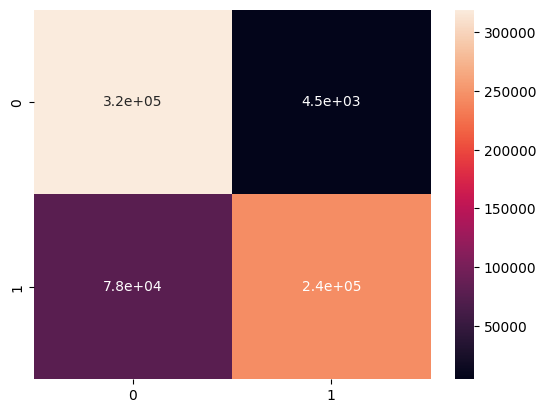

Confusion matrix created!
Validating model Adaptive Boosting
Fitting model...
Finished fitting model!
Predicting..
Finished predicting!
Creating classification report...
              precision    recall  f1-score   support

           0       0.82      0.95      0.88    323815
           1       0.94      0.79      0.85    322235

    accuracy                           0.87    646050
   macro avg       0.88      0.87      0.87    646050
weighted avg       0.88      0.87      0.87    646050

Classification report created!
Creating confusion matrix...


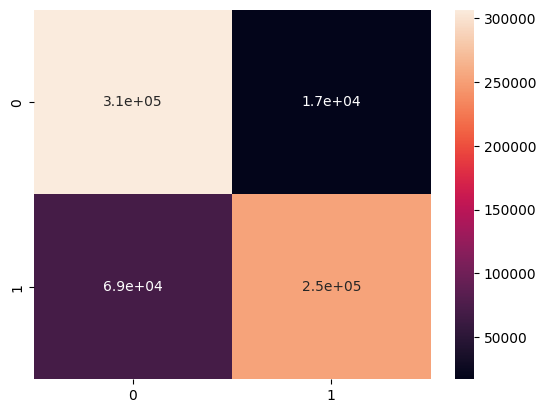

Confusion matrix created!
Validating model Random Forest
Fitting model...
Finished fitting model!
Predicting..
Finished predicting!
Creating classification report...
              precision    recall  f1-score   support

           0       0.82      0.97      0.89    323815
           1       0.96      0.78      0.86    322235

    accuracy                           0.88    646050
   macro avg       0.89      0.87      0.87    646050
weighted avg       0.89      0.88      0.87    646050

Classification report created!
Creating confusion matrix...


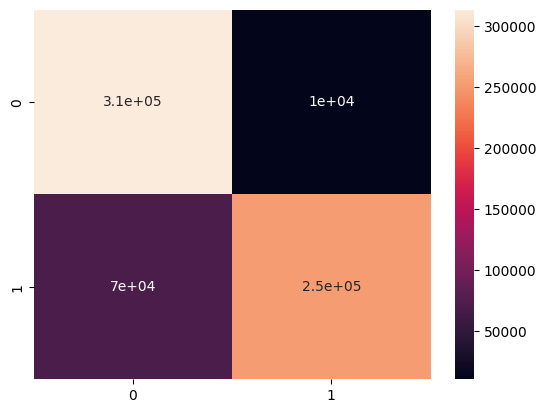

Confusion matrix created!


In [128]:
X_train_wo_macro, X_test_wo_macro, y_train, y_test = train_test_split(X_over_wo_macro, y_over, test_size=0.3, random_state=42)

X_train_wo_macro = scaler.fit_transform(X_train_wo_macro)
X_test_wo_macro = scaler.transform(X_test_wo_macro)

for name, model in models.items():
    print(f'Validating model {name}')
    model_copy = deepcopy(model)
    
    print('Fitting model...')
    model_copy.fit(X_train_wo_macro, y_train)
    print('Finished fitting model!')
    
    print('Predicting..')
    preds = model_copy.predict(X_test_wo_macro)
    y_test_arr = y_test.to_numpy()
    print('Finished predicting!')
    
    # print out the classification report
    print('Creating classification report...')
    print(classification_report(y_test_arr, preds))
    print('Classification report created!')
    
    # plot the confusion matrix
    print('Creating confusion matrix...')
    cm = confusion_matrix(y_test_arr, preds)
    sns.heatmap(cm, annot=True)
    plt.show()
    print('Confusion matrix created!')

#### With macroeconomic features

Validating model Logistic Regression
Fitting model...
Finished fitting model!
Predicting..
Finished predicting!
Creating classification report...
              precision    recall  f1-score   support

           0       0.80      0.99      0.89    323815
           1       0.98      0.76      0.86    322235

    accuracy                           0.87    646050
   macro avg       0.89      0.87      0.87    646050
weighted avg       0.89      0.87      0.87    646050

Classification report created!
Creating confusion matrix...


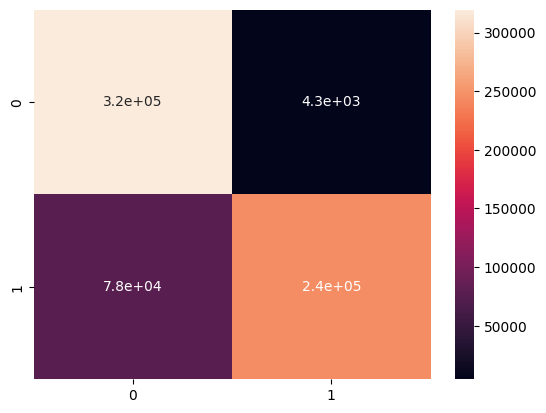

Confusion matrix created!
Validating model Adaptive Boosting
Fitting model...
Finished fitting model!
Predicting..
Finished predicting!
Creating classification report...
              precision    recall  f1-score   support

           0       0.82      0.94      0.88    323815
           1       0.93      0.79      0.86    322235

    accuracy                           0.87    646050
   macro avg       0.87      0.87      0.87    646050
weighted avg       0.87      0.87      0.87    646050

Classification report created!
Creating confusion matrix...


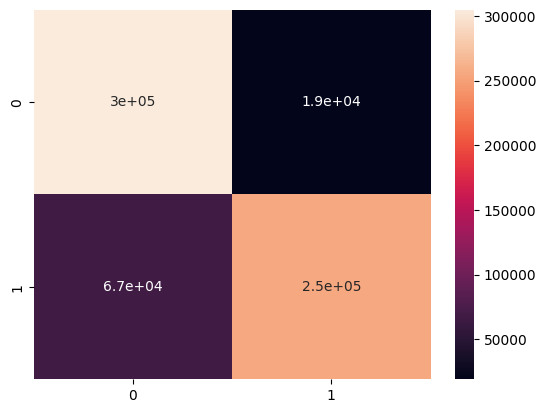

Confusion matrix created!
Validating model Random Forest
Fitting model...
Finished fitting model!
Predicting..
Finished predicting!
Creating classification report...
              precision    recall  f1-score   support

           0       0.82      0.97      0.89    323815
           1       0.96      0.78      0.86    322235

    accuracy                           0.88    646050
   macro avg       0.89      0.88      0.88    646050
weighted avg       0.89      0.88      0.88    646050

Classification report created!
Creating confusion matrix...


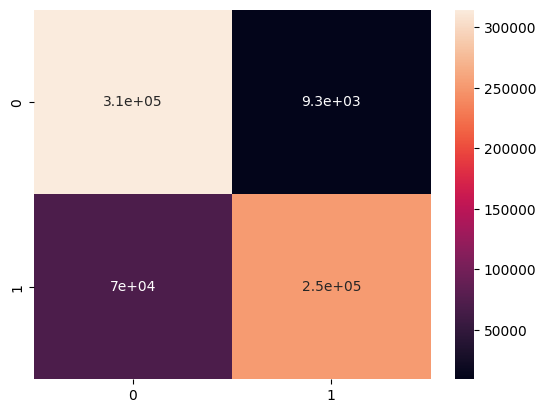

Confusion matrix created!


In [129]:
X_train_w_macro, X_test_w_macro, y_train, y_test = train_test_split(X_over_w_macro, y_over, test_size=0.3, random_state=42)

X_train_w_macro = scaler.fit_transform(X_train_w_macro)
X_test_w_macro = scaler.transform(X_test_w_macro)

for name, model in models.items():
    print(f'Validating model {name}')
    model_copy = deepcopy(model)
    
    print('Fitting model...')
    model_copy.fit(X_train_w_macro, y_train)
    print('Finished fitting model!')
    
    print('Predicting..')
    preds = model_copy.predict(X_test_w_macro)
    y_test_arr = y_test.to_numpy()
    print('Finished predicting!')
    
    # print out the classification report
    print('Creating classification report...')
    print(classification_report(y_test_arr, preds))
    print('Classification report created!')
    
    # plot the confusion matrix
    print('Creating confusion matrix...')
    cm = confusion_matrix(y_test_arr, preds)
    sns.heatmap(cm, annot=True)
    plt.show()
    print('Confusion matrix created!')